# INN Hotels Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Suppressing warnings with the exception of convergence warnings
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tools.sm_exceptions import ConvergenceWarning

# Libraries for handling datasets
import numpy as np
import pandas as pd

# Libraries for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Libraries for statistical tests/analyses
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Libraries for classification
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from statsmodels.tools.tools import add_constant
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score,
                             make_scorer, confusion_matrix, roc_curve, roc_auc_score,
                             precision_recall_curve)

# Setting the theme and fontsize of figures
sns.set_theme(style = 'darkgrid', font_scale = 1.13)

# Restricting the float value of a dataframe to 3 decimal points
pd.set_option('display.float_format', lambda x: '%.3f' % x)
# Removing the limit for the number of displayed columns
pd.set_option("display.max_columns", None)

# Mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Overview

- Observations
- Sanity checks

### General Observations

In [2]:
# Importing the dataset
data_orig = pd.read_csv('/content/drive/MyDrive/Python_files/INNHotelsGroup.csv')

# Ensuring the original data remains unchanged
df = data_orig.copy()

# Peeking the first five rows
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [3]:
# Peeking the last five rows
df.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.800,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.950,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.390,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.500,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.670,0,Not_Canceled


In [4]:
# Checking the shape of dataset
print('Dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

Dataset has 36275 rows and 19 columns.


In [5]:
# General infor on the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [6]:
# Checking for missing values and duplicates
print('Dataset has {} missing values and {} duplicated entries.'.format(df.isnull().sum().sum(),
                                                                        df.duplicated().sum()))

Dataset has 0 missing values and 0 duplicated entries.


### Observations:


*   The dataset contains 36275 unique booking IDs, and for each unique ID 18 different features have been reported.
*   Excluding the booking ID, there are four object-type (categorical) variables: meal plan, room type, market segment and booking status. Some of the integer-type columns, which take very limited values, e.g., 'required_car_parking_space' and 'repeated_guest' can also be deemed categorical, as their values correspond to 'Yes' and 'No'. 
*   The remainder of columns are numerical features, with only one of them (average room price) being a continuous (float-type) variable.
*   There appears to be no missing values or duplicated entries.


### Minor Modifications

In [7]:
# Let's first shorten the names of some columns
df.rename(columns = {'no_of_adults': 'adults', 'no_of_children': 'children', 
                     'no_of_week_nights': 'week_nights', 'no_of_weekend_nights': 'weekend_nights',
                     'type_of_meal_plan': 'meal_plan', 'required_car_parking_space': 'parking',
                     'room_type_reserved': 'room_type', 'market_segment_type': 'market_segment',
                     'no_of_previous_cancellations': 'cancellations', 
                     'no_of_previous_bookings_not_canceled': 'not_cancelled_bookings', 
                     'no_of_special_requests': 'special_requests', 'avg_price_per_room': 'avg_room_price',
                     'booking_status': 'cancelled'}, inplace = True)

# Let's shorten the contents of some of the columns as well
df['room_type'].replace(['Room_Type 1', 'Room_Type 2', 'Room_Type 3', 'Room_Type 4', 'Room_Type 5',
                         'Room_Type 6', 'Room_Type 7'], ['Type 1', 'Type 2', 'Type 3', 'Type 4', 'Type 5',
                         'Type 6', 'Type 7'], inplace = True)
df['meal_plan'].replace(['Not Selected', 'Meal Plan 1', 'Meal Plan 2', 'Meal Plan 3'], 
                        ['None', 'Plan 1', 'Plan 2', 'Plan 3'], inplace = True)
df['market_segment'].replace('Complementary', 'Complimentary', inplace = True)

df.head()

,Booking_ID,adults,children,weekend_nights,week_nights,meal_plan,parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_segment,repeated_guest,cancellations,not_cancelled_bookings,avg_room_price,special_requests,cancelled
0,INN00001,2,0,1,2,Plan 1,0,Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,INN00002,2,0,2,3,None,0,Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,INN00003,1,0,2,1,Plan 1,0,Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled
3,INN00004,2,0,0,2,Plan 1,0,Type 1,211,2018,5,20,Online,0,0,0,100.000,0,Canceled
4,INN00005,2,0,1,1,None,0,Type 1,48,2018,4,11,Online,0,0,0,94.500,0,Canceled


In [8]:
# Let's drop the unhelpful columns
df.drop(columns = 'Booking_ID', axis = 1, inplace = True)
df.head(3)

,adults,children,weekend_nights,week_nights,meal_plan,parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_segment,repeated_guest,cancellations,not_cancelled_bookings,avg_room_price,special_requests,cancelled
0,2,0,1,2,Plan 1,0,Type 1,224,2017,10,2,Offline,0,0,0,65.000,0,Not_Canceled
1,2,0,2,3,None,0,Type 1,5,2018,11,6,Online,0,0,0,106.680,1,Not_Canceled
2,1,0,2,1,Plan 1,0,Type 1,1,2018,2,28,Online,0,0,0,60.000,0,Canceled


#### Notes:

All booking IDs are unique and can't help with building an ML-based model.

In [9]:
# Let's replace 0/1 numerical values with with Yes and No
df['repeated_guest'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['parking'].replace({0: 'No', 1: 'Yes'}, inplace = True)
df['cancelled'].replace({'Not_Canceled': 'No', 'Canceled': 'Yes'}, inplace = True)

# Let's convert arrival_month to category 
import calendar 
df['arrival_month'].replace(np.arange(1, 13), calendar.month_abbr[1:13], inplace = True)
df['arrival_year'] = pd.Categorical(df['arrival_year'])
df.head(3)

,adults,children,weekend_nights,week_nights,meal_plan,parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_segment,repeated_guest,cancellations,not_cancelled_bookings,avg_room_price,special_requests,cancelled
0,2,0,1,2,Plan 1,No,Type 1,224,2017,Oct,2,Offline,No,0,0,65.000,0,No
1,2,0,2,3,None,No,Type 1,5,2018,Nov,6,Online,No,0,0,106.680,1,No
2,1,0,2,1,Plan 1,No,Type 1,1,2018,Feb,28,Online,No,0,0,60.000,0,Yes


#### Notes:

*   Here, we converted numerical features with 0/1-type entries into categorical variables that take Yes and No, which makes working with them in the EDA section more convenient.

*   We also converted month and year into categories, to visualize them more more clearly in for the EDA section. Note that there are only two unique values for arrival_year.

### Statistical Overview

In [10]:
# Statistical summary of numerical features
df.describe(include = np.number).T

,count,mean,std,min,25%,50%,75%,max
adults,36275.000,1.845,0.519,0.000,2.000,2.000,2.000,4.000
children,36275.000,0.105,0.403,0.000,0.000,0.000,0.000,10.000
weekend_nights,36275.000,0.811,0.871,0.000,0.000,1.000,2.000,7.000
week_nights,36275.000,2.204,1.411,0.000,1.000,2.000,3.000,17.000
lead_time,36275.000,85.233,85.931,0.000,17.000,57.000,126.000,443.000
arrival_date,36275.000,15.597,8.740,1.000,8.000,16.000,23.000,31.000
cancellations,36275.000,0.023,0.368,0.000,0.000,0.000,0.000,13.000
not_cancelled_bookings,36275.000,0.153,1.754,0.000,0.000,0.000,0.000,58.000
avg_room_price,36275.000,103.424,35.089,0.000,80.300,99.450,120.000,540.000
special_requests,36275.000,0.620,0.786,0.000,0.000,0.000,1.000,5.000


In [11]:
# Statistical summary of categorical features
cat_summary = df.describe(include = ['category', 'object']).T
cat_summary['fraction'] = cat_summary['freq']/cat_summary['count']
cat_summary

,count,unique,top,freq,fraction
meal_plan,36275,4,Plan 1,27835,0.767
parking,36275,2,No,35151,0.969
room_type,36275,7,Type 1,28130,0.775
arrival_year,36275,2,2018,29761,0.820
arrival_month,36275,12,Oct,5317,0.147
market_segment,36275,5,Online,23214,0.640
repeated_guest,36275,2,No,35345,0.974
cancelled,36275,2,No,24390,0.672


### Observations:


***Numerical Variables:***

*   ***Number of adults*** varies from 0 to 4 with the median being 2 and the mean ~ 1.85. The standard deviation isn't too large compared to the mean. It's note worthy that ~ 0.4% of reservations have only children booked on them with no adults! 
*   The median of ***number of children*** is zero, indicating that most bookings have no children. The mean is also almost zero (0.105 to be exact), but there are reservations with as many as 10 children, suggesting that this variable is highly right-skewed.
*   ***Number of weekend nights*** ranges from 0 to 7, with the mean and median being located at ~ 0.81 and 1, respectively, implying that this feature is right-skewed. Note also that std > mean for this variable, suggesting its large variation.
*   ***Number of week nights*** also seems to be right-skewed. It changes from 0 to 17 (note the large variability), with its mean and median being quite close to each other (~ 2.2 and 2, respectively).
*   The ***lead time*** of arrival varies in the wide range of 0 to 443 days. The mean and median respectively reside at ~ 85 and 57 days, and std is slightly larger than the mean. 
*   The ***arrival date*** ranges from the first day to the largest possible day of the month (31). The mean and median are almost right in the middle and 25th and 75th percentiles are almost 25% and 75% of the way between min and max, suggesting a relatively uniform distribution.
*   The median and 75th percentile of ***previous cancellations*** are zero and its mean is also ~ 0.  This suggests that at least 75% of bookings have had no previous cancellations. There are some guests who've had up to 13 cancellations in the past. 
*   The median and 75th percentile of ***previous not cancelled bookings*** are zero, too, and its mean is also ~ 0.  On one hand, this suggests that at least 75% of travelers have had no shown-up in the past, and on another hand, combined with the observation for the previous cancellations implies that most guests are booking at INN hotels for the first time. There are some customers with up to 58 not cancelled past reservations (shown-ups).
*   The median and mean of the ***average room price*** are close to each other (~ 99 and ~ 103, respectively) and fairly distant from the max (540 Euros), implying average room price is a right-skewed variable. We notice that 50% of bookings cost between ~ 80 to 120 Euros, while close to 1.5% of them are priced at zero! Possibly because of some special deals or pormotions (complimentary segment or other reasons).
*   At least 75% of the customers make 1 or fewer ***special request***, while some make up to 5. 

***Categorical variables:***


*   ~ 77% of customers order plan 1 as their ***meal plans***.
*   ~ 97% of customers require no reserved ***parking spaces***.
*   ~ 78% of customers are booked for ***room type*** 1.
*   This dataset contains only two ***arrival years*** (2017 and 2018), and 82% of customers have made their reservations for 2018.
*   Around 15% of bookings are made for October, making it the most frequent ***arrival month***.
*   64% of ***market segments*** are online.
*   Only about 2.5% of customers are ***repeated guests***.
* Almost 1/3 of bookings have been ***cancelled***, which looks fairly huge.




## Exploratory Data Analysis (EDA)

In the following EDA, we aim to address the questions asked below, but the EDA will be far more comprehensive than merely answering the leading questions.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [12]:
# Auxiliary function for annotating the bars in a countplot
def countplot_labeling(cntplt, data, perc = True, decimal = 1):
  ''' This function gets a countplot and the dataset that has generated
  the plot to produce the values corresponding to each bar (category).
  If perc = True, percentages will be shown.'''

  from math import isnan

  total = data.shape[0]  # total number of values in the dataset
  for p in cntplt.patches:
        height_val = float(p.get_height())
        if(isnan(height_val)):
          height_val = 0
        if(abs(height_val - round(height_val)) < 1e-6):
          height_val = int(height_val)  
        if perc == True:
          # percentage of each category
          label = "{:.1f}%".format(100*height_val/total)
        else:
          label = "{}".format(round(height_val,decimal))  # count of each category
        x = p.get_x() + p.get_width()/2  # width of the plot
        y = p.get_height()  # height of the plot

        if(height_val == 0):
          label = '0'

        # annotate the bar
        cntplt.annotate(label, (x, y), ha = "center", va = "center", size = 12, xytext = (0, 5), textcoords = "offset points")  

### Univariate Analysis

**`No. of Adults`**

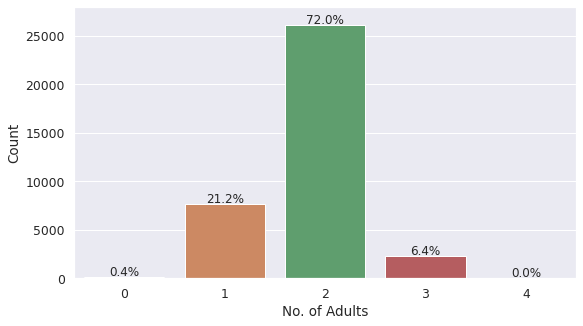

In [13]:
# Plotting the frequency of number of adults in the booking
plt.figure(figsize = (9, 5));
cntplt = sns.countplot(data = df, x = 'adults');
plt.xlabel('No. of Adults');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 28000);

In [14]:
# Let's make sure there is no booking with no person on it
print('The minimum number of total guests in all bookings is {}.'.format(np.min(df['adults'] + df['children'])))

The minimum number of total guests in all bookings is 1.


**`No. of Children`**

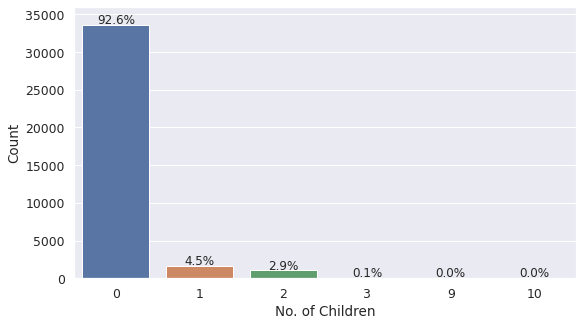

In [15]:
# Plotting the frequency of number of children in the booking
plt.figure(figsize = (9, 5));
cntplt = sns.countplot(data = df, x = 'children');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 36000);

In [16]:
# Viewing the exact counts of bookings with 9 or 10 kids
df.children.value_counts()

0     33577
1      1618
2      1058
3        19
9         2
10        1
Name: children, dtype: int64

In [17]:
# Viewing bookings with 9 kids or more
df.loc[df.children >= 9]

,adults,children,weekend_nights,week_nights,meal_plan,parking,room_type,lead_time,arrival_year,arrival_month,arrival_date,market_segment,repeated_guest,cancellations,not_cancelled_bookings,avg_room_price,special_requests,cancelled
6338,2,10,0,2,Plan 1,No,Type 4,37,2018,Jan,12,Online,No,0,0,84.450,1,No
10041,1,9,2,1,Plan 1,No,Type 1,11,2017,Oct,11,Corporate,No,0,0,95.000,0,No
10061,2,9,2,5,Plan 1,No,Type 2,8,2017,Aug,13,Online,No,0,0,76.500,1,Yes


In [18]:
# Treating bookings with outlier numbers of kids
df.loc[df.children >= 9, 'children'] = 3

#### Notes:
The sudden jump from 3 to 9 in the no. of children, and the fact that only three bookings have these many children prompted us to treat these outliers by replacing their number of kids with 3. This would particularly help with logistic-regression-based modeling, which can be more sensitive to outliers than decision trees. 

**`No. of Reserved Weekend Nights`**

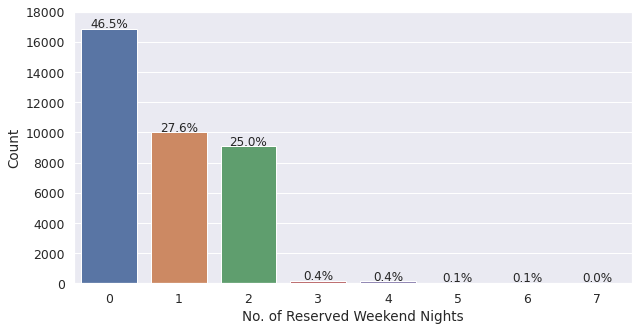

In [19]:
# Plotting the frequency of number of reserved weekend nights
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'weekend_nights');
plt.xlabel('No. of Reserved Weekend Nights');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 18000);

**`No. of Reserved Week Nights`**

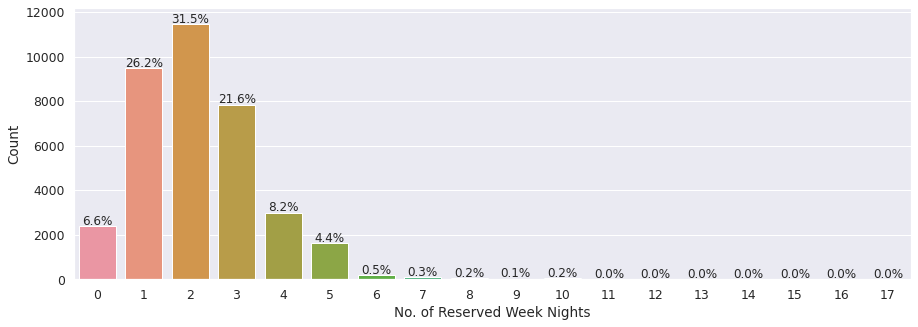

In [20]:
# Plotting the frequency of number of reserved week nights
plt.figure(figsize = (15, 5));
cntplt = sns.countplot(data = df, x = 'week_nights');
plt.xlabel('No. of Reserved Week Nights');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 12200);

In [21]:
# Let's make sure there is no booking with no reserved night
print('The minimum number of total reserved nights is {}.'.format(np.min(df['week_nights'] + df['weekend_nights'])))
print('The maximum number of total reserved nights is {}.'.format(np.max(df['week_nights'] + df['weekend_nights'])))

The minimum number of total reserved nights is 0.
The maximum number of total reserved nights is 24.


There are 78 bookings reserved for 0 nights!


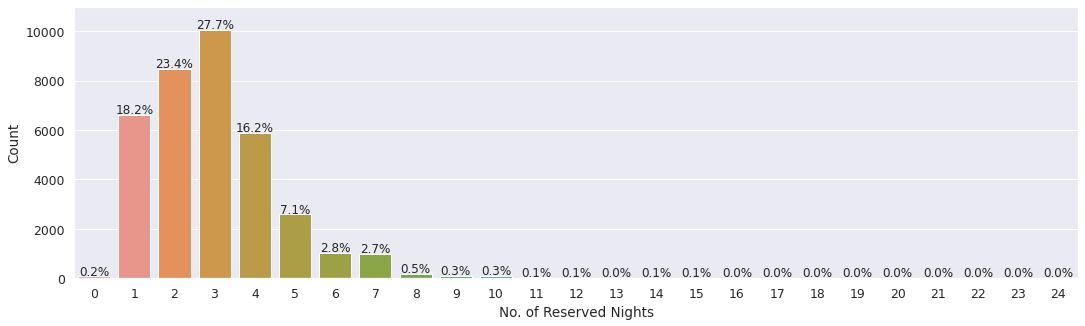

In [22]:
# Making a column containing the total number of reserved nights
df_temp = df.copy()
df_temp['total_nights'] = df['week_nights'] + df['weekend_nights']
print('There are {} bookings reserved for 0 nights!'.format(df_temp.loc[df_temp.total_nights == 0].shape[0]))

# Plotting the frequency of number of reserved week nights
plt.figure(figsize = (18, 5));
cntplt = sns.countplot(data = df_temp, x = 'total_nights');
plt.xlabel('No. of Reserved Nights');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 11000);

#### Notes:
*   Both the no. of reserved week nights and the no of reserved weekend nights occupy quite a wide range, but since there is a continuity between the no. of nights (although the large ones have very small counts), we choose not to treat the outliers. 
*   An odd finding is that 0.2% (78 to be exact) of the reservations have been booked for total of zero nights. We will investigate these entries more closely in the next steps.



In [23]:
# Checking the market segment of bookings with zero total night
df_temp.loc[df_temp['total_nights'] == 0].market_segment.value_counts()

Online           65
Complimentary    13
Name: market_segment, dtype: int64

#### Observations:
13 of reservations with no booked nights come from complimentary segment, for which this might be fine. But the 65 remaining bookings come from online segment. We choose to treat these entries by replacing their reserved week and weekend nights by their most propabale values (modes). 

In [24]:
# Checking the market segment of bookings with zero total night
print('Median of reserved week nights for online segment:', 
      df_temp.loc[df_temp['market_segment'] == 'Online'].week_nights.median())
print('Mode of reserved week nights for online segment:', 
      df_temp.loc[df_temp['market_segment'] == 'Online'].week_nights.mode()[0])
print('Median of reserved weekend nights for online segment:', 
      df_temp.loc[df_temp['market_segment'] == 'Online'].weekend_nights.median())
print('Mode of reserved weekend nights for online segment:', 
      df_temp.loc[df_temp['market_segment'] == 'Online'].weekend_nights.mode()[0])

Median of reserved week nights for online segment: 2.0
Mode of reserved week nights for online segment: 2
Median of reserved weekend nights for online segment: 1.0
Mode of reserved weekend nights for online segment: 0


In [25]:
# Replacing the week and weekend nights of entries with 0 booked nights from online segments with their modes
df_temp.loc[(df_temp['market_segment'] == 'Online') & (df_temp['total_nights'] == 0), 'week_nights'] = 2
df_temp.loc[(df_temp['market_segment'] == 'Online') & (df_temp['total_nights'] == 0), 'weekend_nights'] = 0

df['week_nights'] = df_temp['week_nights'].copy()
df['weekend_nights'] = df_temp['weekend_nights'].copy()

#### Notes:

Mode was chosen over median for imputation, because, in the case of selecting medians, the total nights for the imputed rows would've become three with 2 week nights, and one weekend night, which seems a bit too specific compared to two week nights only. Also changing total nights from 0 to 3 seemed a bit too drastic to me.

**`Meal Plan`**

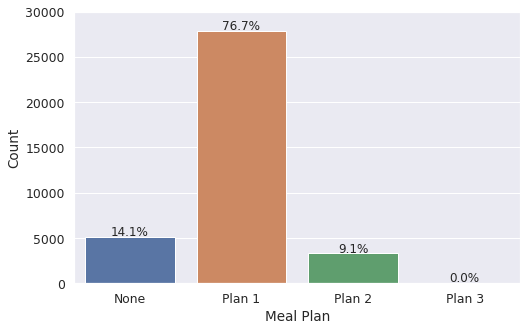

In [26]:
# Plotting the frequency of various meal plans
plt.figure(figsize = (8, 5));
cntplt = sns.countplot(data = df, x = 'meal_plan', order = ['None', 'Plan 1', 'Plan 2', 'Plan 3']);
plt.xlabel('Meal Plan');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 30000);

**`Parking Spaces`**

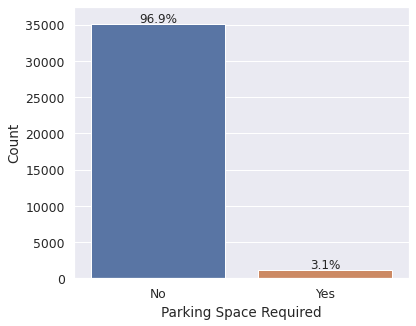

In [27]:
# Plotting the frequency of various meal plans
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'parking');
plt.xlabel('Parking Space Required');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 37500); 

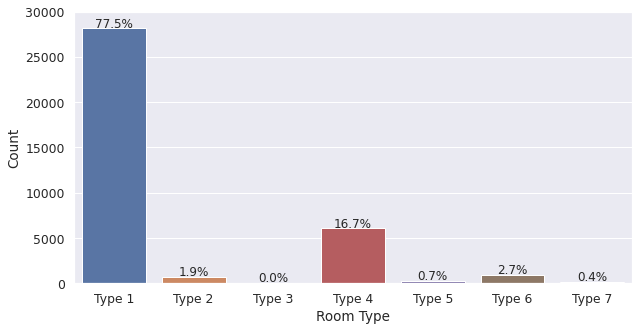

In [28]:
# Plotting the frequency of various room types
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'room_type', order = sorted(df.room_type.unique().tolist()));
plt.xlabel('Room Type');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 30000); 

**`Arrival Year`**

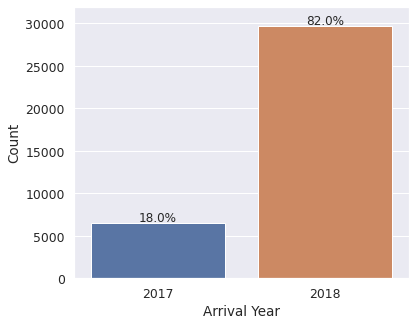

In [29]:
# Plotting the frequency of arrival year of a guest
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'arrival_year', order = [2017, 2018]);
plt.xlabel('Arrival Year');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 32000);

**`Arrival Month`**

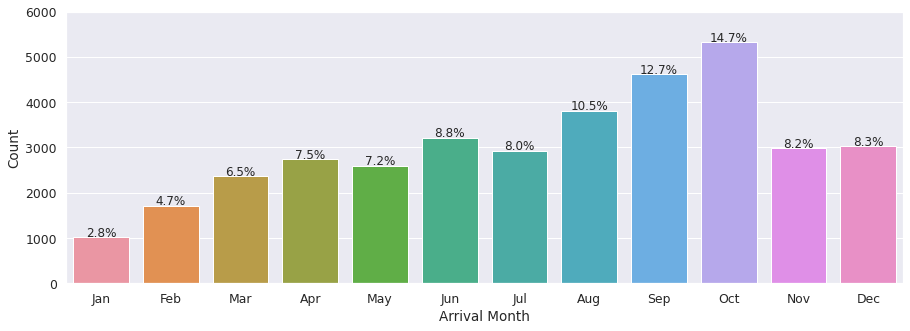

In [30]:
# Plotting the frequency of the arrival month of a guest
plt.figure(figsize = (15, 5));
cntplt = sns.countplot(data = df, x = 'arrival_month', order = calendar.month_abbr[1:13]);
plt.xlabel('Arrival Month');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 6000);

In [31]:
# Let's check the 2017 months for which data is available
df.loc[df.arrival_year == 2017].arrival_month.unique().tolist() 

['Oct', 'Aug', 'Sep', 'Nov', 'Dec', 'Jul']

#### Notes: 
As can be seen, data for only six months of 2017 is available. So a more fair analysis might be only limiting the arrival month countplot to 2018.

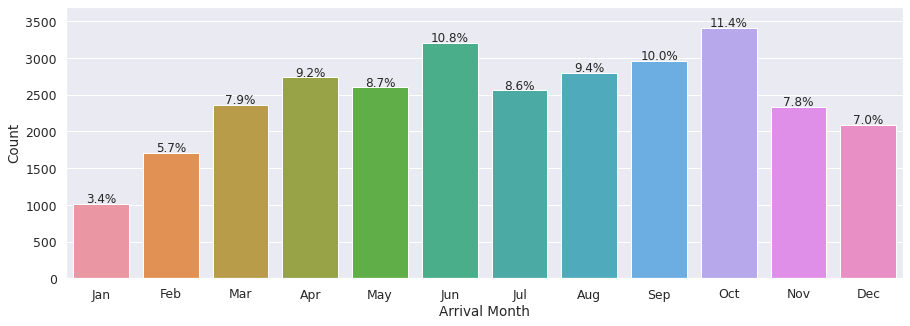

In [32]:
# Plotting the frequency of the arrival month of a guest
plt.figure(figsize = (15, 5));
cntplt = sns.countplot(data = df.loc[df.arrival_year == 2018], x = 'arrival_month',
                       order = calendar.month_abbr[1:13]);
plt.xlabel('Arrival Month');
plt.ylabel('Count');
countplot_labeling(cntplt, df.loc[df.arrival_year == 2018]);
plt.ylim(0, 3700);

**`Type of Market Segment`**

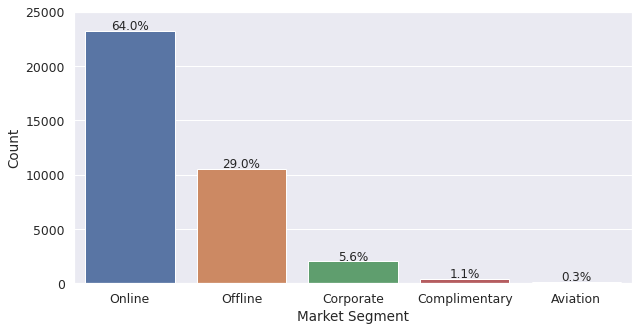

In [33]:
# Plotting the frequency of market segments
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df, x = 'market_segment', 
                       order = df.market_segment.value_counts().index.tolist());
plt.xlabel('Market Segment');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 25000);

**`No. of Special Requests`**

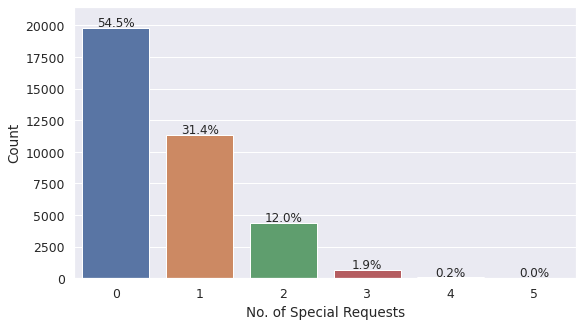

In [34]:
# Plotting the frequency of various meal plans
plt.figure(figsize = (9, 5));
cntplt = sns.countplot(data = df, x = 'special_requests');
plt.xlabel('No. of Special Requests');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 21500);

**`Repeated Guest`**

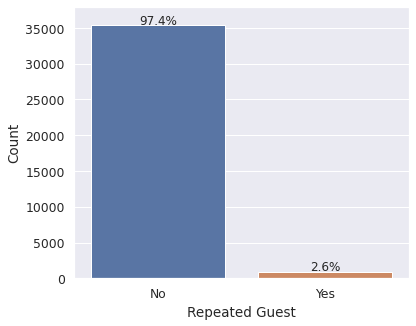

In [35]:
# Plotting the frequency of repeated guests
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'repeated_guest');
plt.xlabel('Repeated Guest');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 38000);

**`No. of Previous Cancelled Reservations`**

In [36]:
# Defining an auxiliary function that turns # of previous cancelled/not cancelled bookings into intervals 
df_temp = df.copy()
def past_booking_intervals(x):
  if(x > 0 and x <= 2):
    txt = '1-2'
  elif(x >= 2 and x <= 5):
    txt = '3-5'
  elif(x > 5 and x <= 10):
    txt = '6-10'
  elif(x > 10):
    txt = '> 10'
  else:
    txt = str(x)

  return txt

In [37]:
# Turning # of previous cancellations into intervals
df_temp = df.copy() 
df_temp['previous_cancelled_range'] = df_temp['cancellations'].apply(past_booking_intervals)

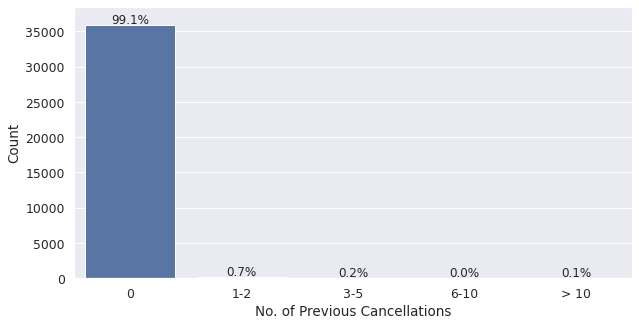

In [38]:
# Plotting the frequency of number previous cancellations
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df_temp, x = 'previous_cancelled_range', 
                       order = ['0', '1-2', '3-5', '6-10', '> 10']);
plt.xlabel('No. of Previous Cancellations');
plt.ylabel('Count');
countplot_labeling(cntplt, df_temp);
plt.ylim(0, 38500);

**`No. of Previous Not Cancelled Reservations`**

In [39]:
# Turning # of previous not cancelled reservations into intervals
df_temp['previous_not_cancelled_range'] = df_temp['not_cancelled_bookings'].apply(past_booking_intervals)

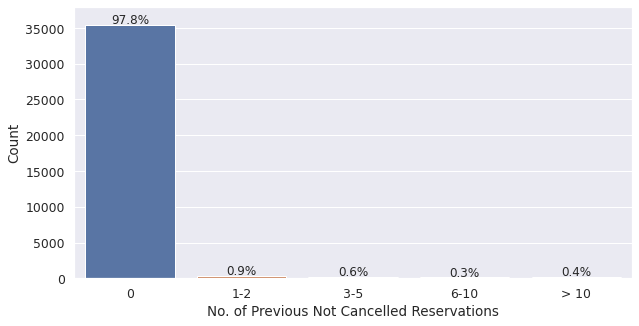

In [40]:
# Plotting the frequency of number previous cancellations
plt.figure(figsize = (10, 5));
cntplt = sns.countplot(data = df_temp, x = 'previous_not_cancelled_range',
                        order = ['0', '1-2', '3-5', '6-10', '> 10']);
plt.xlabel('No. of Previous Not Cancelled Reservations');
plt.ylabel('Count');
countplot_labeling(cntplt, df_temp);
plt.ylim(0, 38000);

#### Notes:
*   We choose to visualize the numbers of previous cancelled and not cancelled bookings in the form of a few intervals, as it makes drawing conclusions from them much more useful and straightforward.
*   Despite the fact that the vast majority of guests have no previous cancelled or not cencelled bookings (mostly becuse they're new guests), and the counts of all categories besides 0 are fairly small, we decide not to alter/modify them in any ways, since there is still some distinguishable continuity between all these classes, and they all seem to be actual data points. 



**`Cancellation Status`**

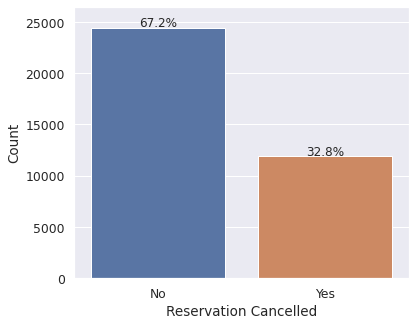

In [41]:
# Plotting the frequency of vcancellation status
plt.figure(figsize = (6, 5));
cntplt = sns.countplot(data = df, x = 'cancelled');
plt.xlabel('Reservation Cancelled');
plt.ylabel('Count');
countplot_labeling(cntplt, df);
plt.ylim(0, 26500);

#### Observations from the Univariate Analysis of Categorical Variables:

*   Note that, here, some of the discrete numerical variables have been assumed categorical, and demonstrated by countplots, as they consist of only a limited number of classes (categories), and visualizing them this way would reveal more useful information. 
*   An overwhelming number of bookings (72%) have two ***adults*** on them. This might be mainly attributed to couples traveling with or without kids. In 0.4% of entries, only children are on the booking!  
*   93% of bookings have no ***children*** on them. Only 0.1% of them have more than two kids. The odd ones with 9 and 10 kids were modified, as discussed.
*   ~53.5% of bookings have been fully or partially made for ***weekend nights***, but only about 1% of them have been booked for more than two weekend nights, which is reasonable, because this only happens for reservations that are longer than a week, which are very rare.  
*   Only less than 7% of reservations do not have any booked week nights. Almost 1/3 of reservations have 2 ***week nights*** on them. Although there are reservations booked with up to 17 week nights, bookings with more than 5 week nights on them are quite rare, and make up less 1.5% of all entries. Note that a booking made for more than five week nights is certainly longer than a week.   
*   The most popular ***meal plan*** is plan 1 (only breakfast) selected by 76.7% of guests. 14.1% have selected no meal plans. 
*   Only 3.1% of guests require ***parking spaces***.
*   ***Room type*** 1 has been assigned to 77.5% of guests. After that room tpe 4 is the most assigned one with 16.7%. Room type 3 (the least frequent room type) has been rarely assigned to any reservations.  
*   82% of guests in the dataset arrive in 2018. This is mainly because the 2017 data only covers six months of the ***year***, and a bit because the business saw a growth in 2018.
*   October, September and August (two of which falling in summer) are respectively the most booked ***months*** for the hotel chain, while January and February (the coldest months of the year) are respectively the least booked ones. These findings are obtained using the full data. Using only the 2018 data (since 2017 data isn't complete) makes the numbers somewhat closer to one another, but the overall conclusions remain valid. The major change is that the most booked months become October, June and September, respectively.  
*   64% of guests come from online ***market segment***. 1.1% of them get complimentary rates, and only 0.3% of them (the least frequent one) come from aviation.
*   54.5% of guests do not make any ***special requests***, and only 2.1% of them make more than 2.
*  Only 2.6% of ***bookings*** are made by repeated guests.
* 99.1% of customers do not have any ***previous cancellations***, and merely 0.26% of them have more than two cancellations, but it should be noted that the vast majority of them are new guests.
*   97.8% of guests have no previous ***not cancelled reservations***, and only 1.3% of them have more than 2 shown-ups in the past. These numbers should be viewed with a grain of salt, as most guests in the dataset have no previous booking at all. 
*   32.8% of reservations have been ***cancelled***, which seems fairly large.



**`Average Price per Room`**

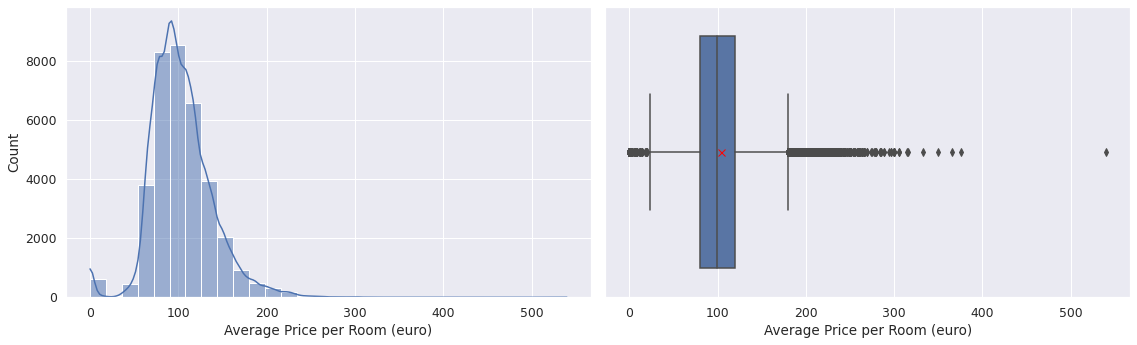

In [42]:
# Plotting the distribution of average room price
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'avg_room_price', bins = 30, kde = True);
plt.xlabel('Average Price per Room (euro)');
plt.subplot(122);
sns.boxplot(data = df, x = 'avg_room_price', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.tight_layout();

In [43]:
# Checking bookings with price == 0
print('{} ({}%) of reservations have been free of charge.'.format(
    df.loc[df.avg_room_price == 0].shape[0], np.round(df.loc[df.avg_room_price == 0].shape[0]/df.shape[0]*100, 2)), end = '\n'*2)
print('Shares of market segments for free-of-charge bookings: \n', 
      df.loc[df.avg_room_price == 0].market_segment.value_counts(1), end = '\n'*2, sep = '')

545 (1.5%) of reservations have been free of charge.

Shares of market segments for free-of-charge bookings: 
Complimentary   0.650
Online          0.350
Name: market_segment, dtype: float64



In [44]:
# Low-price bookings that aren't free
print('No. of bookings priced below 20 euros that aren\'t free:', 
      df.loc[(df.avg_room_price != 0) & (df.avg_room_price < 20)].shape[0])

No. of bookings priced below 20 euros that aren't free: 80


In [45]:
# Let's treat the value of the most expensive booking that clearly stands out
second_max = df.loc[df.avg_room_price < 500].avg_room_price.max() # second largest price
df.loc[df.avg_room_price > 500, 'avg_room_price'] = second_max

#### Notes:


*   One thing that stands out about average price per room is that several bookings (~ 1.5%) are free of charge. We note that many of these bookings come from comlimentary market segment, which are naturally free, but they also include some online bookings. Regardless, we choose to leave these entries at their current form, because even the online ones could be part of some special deals/promos.  
*   In addition to free bookings, there are some bookings whose room prices are suspiciously low (80 less than 20 euros). We choose not to alter these entries either, as they also might be the results of some special discounts/deals.  
*   Although there are several outliers on the both sides of price variable, we mostly opt to leave them at their given values. The only one that we modified was the most expensive booking that is clearly separate from the remainder of the data. This value might've been natural, and part of the actual data, too, but anyways, since logistic regression is somewhat sensitive to large outliers, and it may increase the accuracy of the modeling slightly, and this distinct value will only appear in one of the training/validation/testing  sets, we choose to replace it by the second largest room price. 



**`Lead Time`**

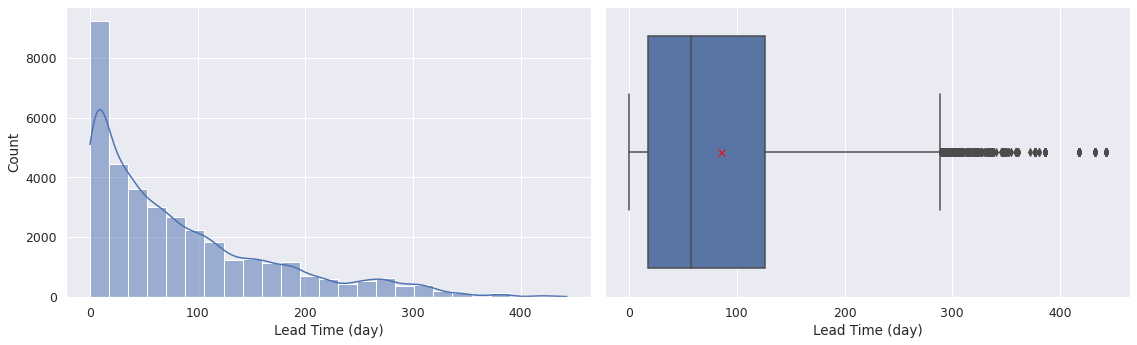

In [46]:
# Plotting the distribution of lead time in days
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'lead_time', bins = 25, kde = True);
plt.xlabel('Lead Time (day)');
plt.subplot(122);
sns.boxplot(data = df, x = 'lead_time', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Lead Time (day)');
plt.tight_layout();

**`Arrival Date`**

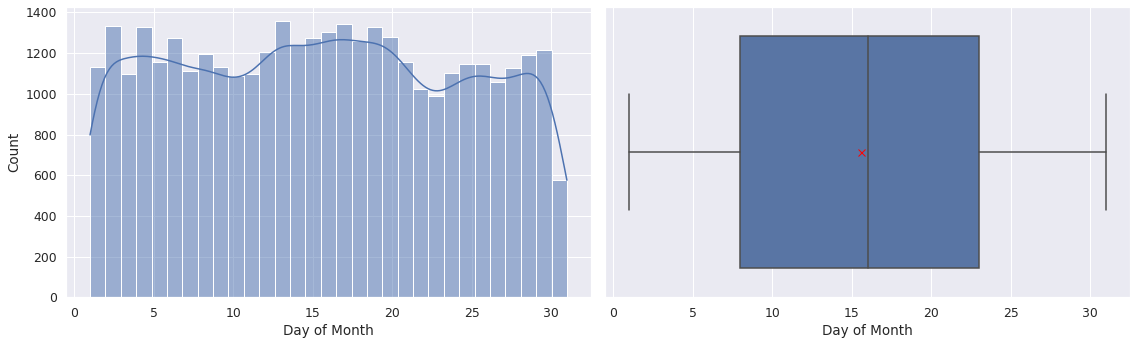

In [47]:
# Plotting the distribution of average room price
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.histplot(data = df, x = 'arrival_date', bins = 31, kde = True);
plt.xlabel('Day of Month');
plt.subplot(122);
sns.boxplot(data = df, x = 'arrival_date', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Day of Month');
plt.tight_layout();

#### Observations from the Univariate Analysis of Numerical Variables:



*   About 1.5% of reservations are free of charge. The mean and median of ***average price per room*** reside around 100 euros, while its highly right-skewed distribution reveals outliers on both sides of the boxplot. 
*   As expected, most guests do not give very long ***lead time*** to the hotel, rendering the lead time distribution strongly right-skewed, with many outliers to the right of the main boxplot. Regardless, one average, guests give ~ 85 days lead time to the hotel, and 50% of them book 57 days before their arrival date.
*   The distribution of ***arrival date*** is fairly balanced and uniform ,with mean and median lying in the middle (15.6 and 16, respectively), which is anticipated, as no day of month has real significance over the others. There is an abrupt decline for 31, since several months do not have 31 days.



### Bivariate Analysis

The provided dataset is comprised of many columns, making the possibilities for bivariate analysis quite large. Therefore, we limit our bivariate anaylysis to the understanding of the relationships between some of the most important parameters, while being guided by the leading questions. 

**`Correlation Heatmap of Numerical Variables`**

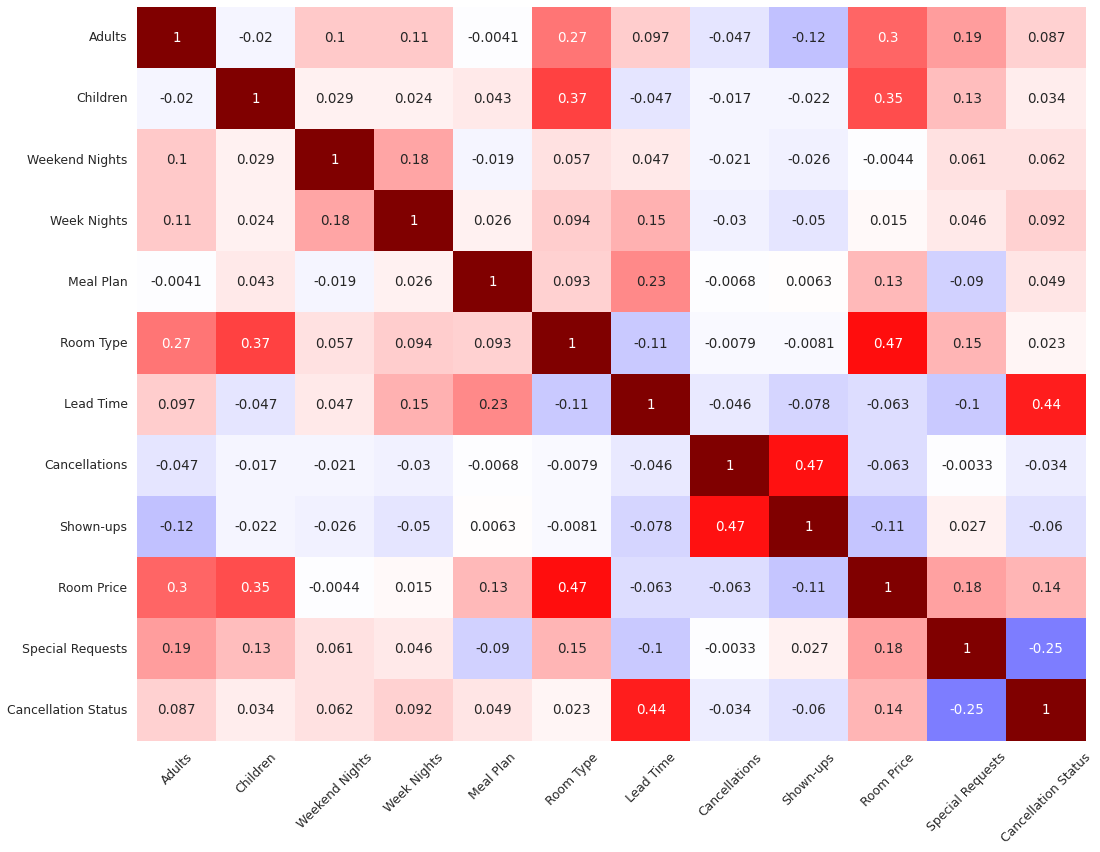

In [48]:
# Generating a dataset suitable for correlation map
df_temp = df.copy()
# Making meal plan numerical as it's ordered and may correlate with price
df_temp['meal_plan'].replace(['None', 'Plan 1', 'Plan 2', 'Plan 3'], [0, 1, 2, 3], inplace = True) 
df_temp['cancelled'].replace(['No', 'Yes'], [0, 1], inplace = True) # Making cancellation status numerical
df_temp['room_type'].replace(sorted(df.room_type.unique().tolist()), np.arange(1, 8), inplace = True) # Making room type numerical
df_temp.drop(columns = 'arrival_date', axis = 1, inplace = True);  # we showed there's no real difference btwn arrival dates 

plt.figure(figsize = (17, 13.5));
corr_map = sns.heatmap(data = df_temp.corr(), annot = True, vmin = -1, vmax = 1, cmap = 'seismic', cbar = False);
corr_map.set_xticklabels(['Adults', 'Children', 'Weekend Nights', 'Week Nights', 'Meal Plan', 'Room Type', 
                          'Lead Time', 'Cancellations', 'Shown-ups', 'Room Price', 'Special Requests', 'Cancellation Status']);
corr_map.set_yticklabels(['Adults', 'Children', 'Weekend Nights', 'Week Nights', 'Meal Plan', 'Room Type', 
                          'Lead Time', 'Cancellations', 'Shown-ups', 'Room Price', 'Special Requests', 'Cancellation Status']);
plt.xticks(rotation = 45);           

#### Observations:

*   The only variables ***Cancellation status*** shows some noticeable positive correlations with are lead time and room price. It also exhibits a fairly notable negative correlation with no. of requests. i.e., more expensive bookings and those with bigger lead time are more likely to get cancelled, and guests with special requests are more likely to remain committed to their reservations. 
*   ***No. of previous cancellations and shown-ups*** don't correlate strongly with cancellation status, as most guests are new.
*   ***Room price*** increases with the no. of people on the booking (adults or children), as more people need bigger rooms with more beds. No. of special requests and a more inclusive meal plan also raise the price, as expected. A higher number for room type also appears to correspond to a more expensive room.
*   Predictably, no. of ***special requests*** increases with the no. of people on the booking (adults or children).



**`Price vs. Market Segment`**

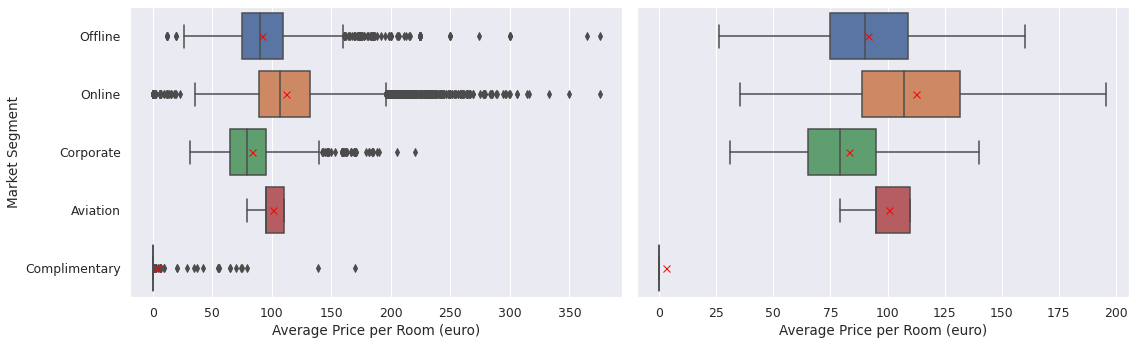

In [49]:
# The distribution of average room price wrt market segment
plt.figure(figsize = (16, 5));
plt.subplot(121);
bxplt1 = sns.boxplot(data = df, x = 'avg_room_price', y = 'market_segment', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('Market Segment');
plt.subplot(122);
bxplt2 = sns.boxplot(data = df, x = 'avg_room_price', y = 'market_segment', showmeans = True, showfliers = False,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('');
bxplt2.yaxis.set_ticklabels([]); 
plt.tight_layout();

In [50]:
# Looking at complimentary segment more closely
print('{}% of complimentary bookings ({} to be exact) haven\'t been fully free:'.format( 
      round(df.loc[(df.market_segment == 'Complimentary') & (df.avg_room_price > 0)].shape[0]
            /df.loc[df.market_segment == 'Complimentary'].shape[0]*100, 2),
            df.loc[(df.market_segment == 'Complimentary') & (df.avg_room_price > 0)].shape[0]))

9.46% of complimentary bookings (37 to be exact) haven't been fully free:


#### Observations:

*   Roughly speaking, the bookings of online market segment are slightly more expensive, but overall, there is no significant difference between the mean and median prices of various classes, except for complimentary reservations that are expectedly much cheaper. In fact, the 25th, 50th and 75th percentiles of this category are all zero.   

*   37 complimentary bookings haven't been completely free of charge, which might've been caused by special requests, meal plans or some additional services that were not included in the deal.



**`Price vs. Room Type`**


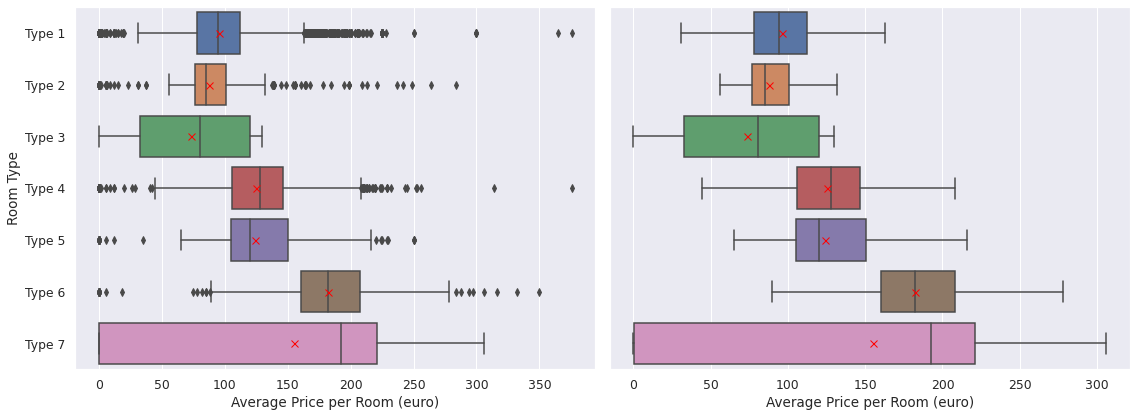

In [51]:
# The distribution of average room price wrt room type
plt.figure(figsize = (16, 6));
plt.subplot(121);
bxplt1 = sns.boxplot(data = df, x = 'avg_room_price', y = 'room_type', 
                    order = sorted(df.room_type.unique().tolist()), showmeans = True, showfliers = True,
                    meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');            
plt.ylabel('Room Type'); 
plt.subplot(122);
bxplt2 = sns.boxplot(data = df, x = 'avg_room_price', y = 'room_type', 
                     order = sorted(df.room_type.unique().tolist()), showmeans = True, showfliers = False,
                     meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('');
bxplt2.yaxis.set_ticklabels([]); 
plt.tight_layout();   

#### Observations

*   Roughly speaking, the average price of a room grows with its type no., explaining the high correlation (0.47) between these two variables. 

*   This correlation may indicate that room type can also be converted to a numerical variable, as it seems ordered (at least based on price).

**`Cancellation Status vs. Room Type`**


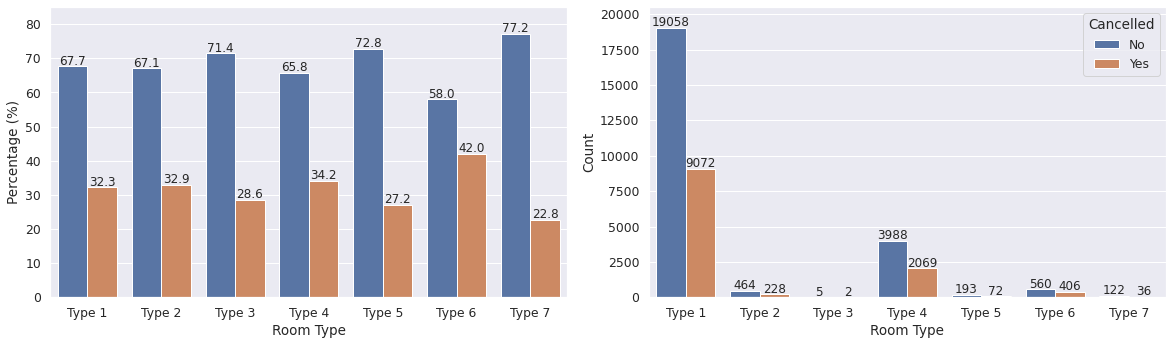

In [52]:
# Generating a crosstab of market segment and cancellation status
ctab = pd.crosstab(df['room_type'], df['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (16.5, 5));
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'room_type', y = 'value', hue = 'cancelled');
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Room Type');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Cancelled', loc = 'upper right').set_visible(False);
plt.ylim(0, 85);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'room_type', hue = 'cancelled', 
                       order = sorted(df['room_type'].unique()));
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Room Type');
plt.ylabel('Count');
plt.legend(title = 'Cancelled', loc = 'upper right');
plt.ylim(0, 20500);
plt.tight_layout();

#### Observations:
Guests staying at room type 6 have the highest cancellation rate, while those staying at room type 7 are the least likely ones to cancel, but, overall, there isn't a clear-cut relationship between cancellation rate and room type, and for many of the room types, it's just around 1/3, which is nearly the cancellation rate of the full data.

**`Cancellation Status vs. Market Segment`**



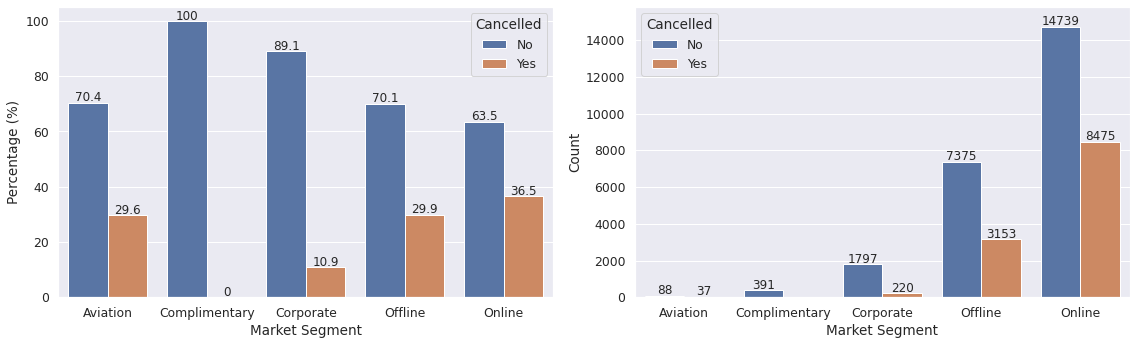

In [53]:
# Generating a crosstab of market segment and cancellation status
ctab = pd.crosstab(df['market_segment'], df['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (16, 5));
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'market_segment', y = 'value', hue = 'cancelled');
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Market Segment');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Cancelled', loc = 'upper right');
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'market_segment', hue = 'cancelled', 
                       order = sorted(df['market_segment'].unique()));
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Market Segment');
plt.ylabel('Count');
plt.legend(title = 'Cancelled', loc = 'upper left');
plt.ylim(0, 15800);
plt.tight_layout();

#### Observations:
Customers from online segment have the highest percentage of cancellation. As expected, nobody has refused a complimentary rate and none of the bookings in this segment have been cancelled.

**`Cancellation Status vs. Special Requests`**

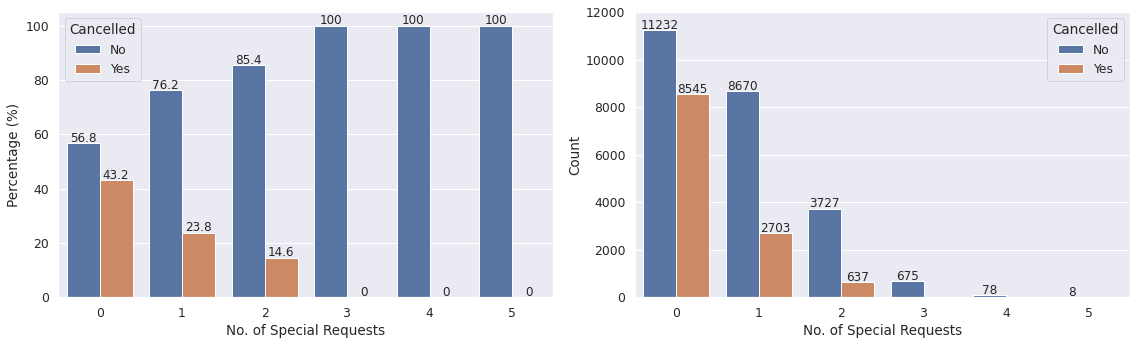

In [54]:
# Generating a crosstab of special requests and cancellation status
ctab = pd.crosstab(df['special_requests'], df['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (16, 5));
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'special_requests', y = 'value', hue = 'cancelled');
plt.xlabel('No. of Special Requests');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Cancelled', loc = 'upper left');
countplot_labeling(barplt, ctab_df, perc = False);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'special_requests', hue = 'cancelled');
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('No. of Special Requests');
plt.ylabel('Count');
plt.legend(title = 'Cancelled', loc = 'upper right');
plt.ylim(0, 12000);
plt.tight_layout();

#### Observations:

*   Guests with higher numbers of special requirements are typically more committed to their reservation, and that's why as no. of special requests increases, the percentage of cancellation constantly declines.

*   In fact, guests with more than two requests have had no cancellations.

**`Price vs. Special Requests`**

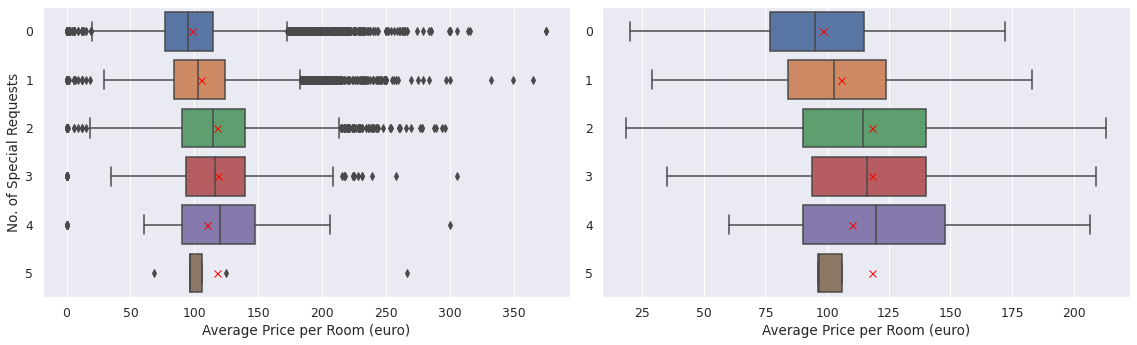

In [55]:
# Creating a temporary categorical special request column
df['special_requests_cat'] = pd.Categorical(df['special_requests']) 
# The distribution of average room price wrt no. of special requests
plt.figure(figsize = (16, 5));
plt.subplot(121);
bxplt1 = sns.boxplot(data = df, x = 'avg_room_price', y = 'special_requests_cat', showmeans = True,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('No. of Special Requests');
plt.subplot(122);
bxplt2 = sns.boxplot(data = df, x = 'avg_room_price', y = 'special_requests_cat', showmeans = True, showfliers = False,
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('');
plt.tight_layout();

#### Observations:

*   Roughly speaking, the average room price somewhat rises as the number of special requests increases. 

*   There are exceptions to this rule of thumb. For instance, no. special requests = 4 has a slightly smaller mean price than no. special request = 3, or the median of no. special request = 5 is less than the median of all classes but no. special request = 0.

*   Overall, the average and median prices of all classes aren't too far from each other.



**`Cancellation Status vs.Price`**




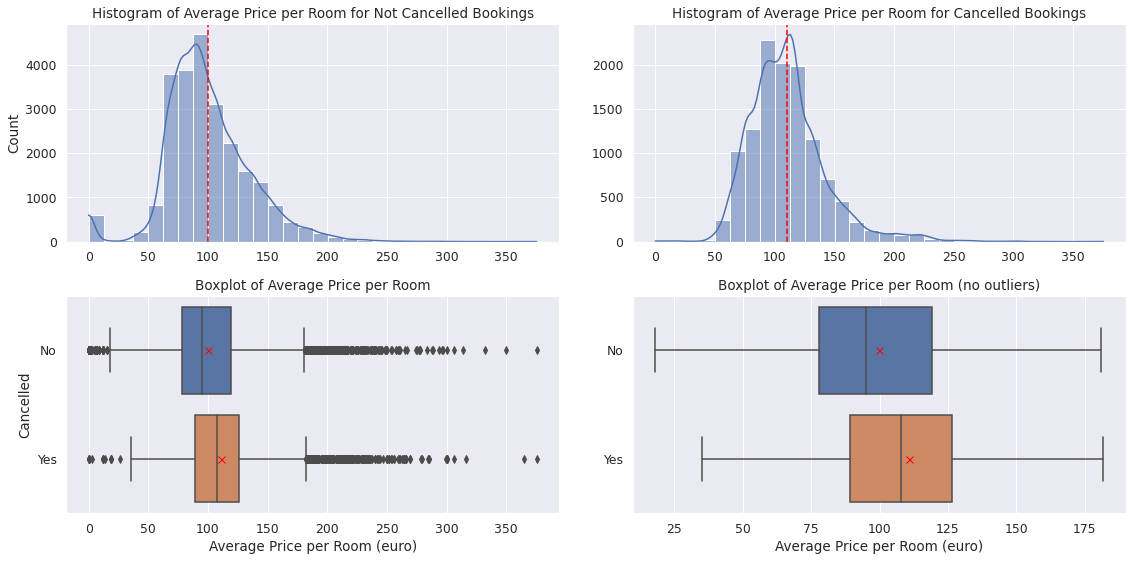

In [56]:
# Distribution of average price per room wrt cancellation status
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.cancelled == 'No'], x = 'avg_room_price', bins = 30, kde = True);
plt.axvline(df.loc[df.cancelled == 'No'].avg_room_price.mean(), linestyle = '--', color = 'red')
plt.xlabel('');
plt.title('Histogram of Average Price per Room for Not Cancelled Bookings')
plt.subplot(222);
sns.histplot(data = df.loc[df.cancelled == 'Yes'], x = 'avg_room_price', bins = 30, kde = True);
plt.axvline(df.loc[df.cancelled == 'Yes'].avg_room_price.mean(), linestyle = '--', color = 'red')
plt.xlabel('');
plt.ylabel('');
plt.title('Histogram of Average Price per Room for Cancelled Bookings')
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'avg_room_price', y = 'cancelled', showmeans = True,
                         meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('Cancelled');
plt.title('Boxplot of Average Price per Room');
plt.subplot(224);
sns.boxplot(data = df, x = 'avg_room_price', y = 'cancelled', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.ylabel('');
plt.title('Boxplot of Average Price per Room (no outliers)');
plt.tight_layout();

#### Observations:

*   The mean and median of average price per room for cancelled bookings is somewhat higher than the mean and median of the reservations that weren't cancelled (~ 11 and ~ 13 euros, respectively).

*   Note also that the mean (red vertical line) and mode (peak) in the average room price histogram of the cancelled bookings have somewhat moved to the right, making the overall distribution slightly less right-skewed.

*   These findings make sense, since guests who've booked more expensive rooms, may keep searching for cheaper rooms at other hotels and end up cancelling their current reservation.




  

**`Cancellation Status vs. Lead Time`**

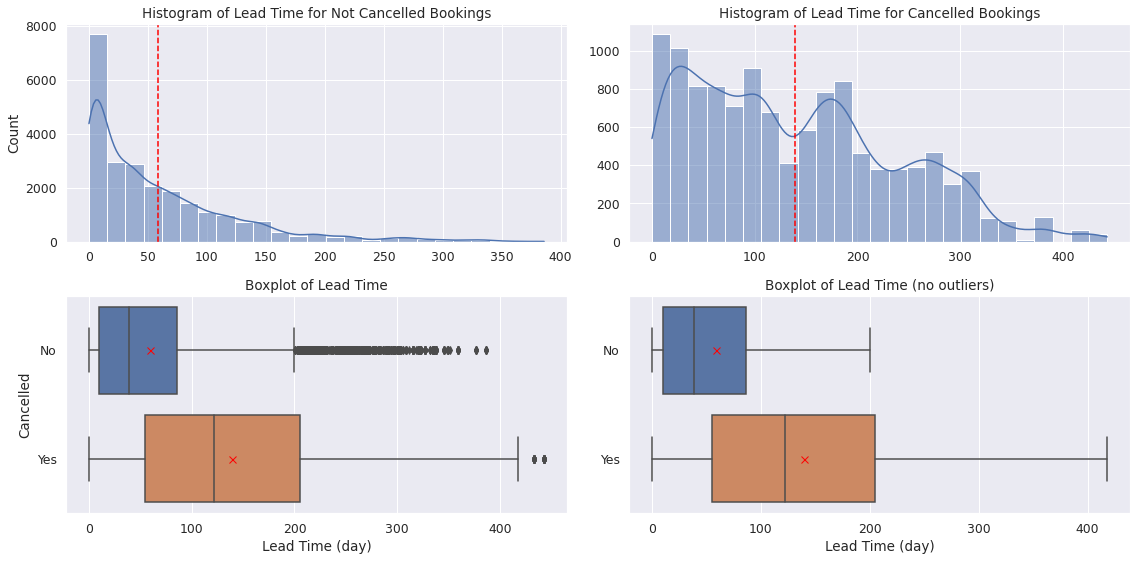

In [57]:
# Distribution of lead time wrt cancellation status
plt.figure(figsize = (16, 8));
# Histograms
plt.subplot(221);
sns.histplot(data = df.loc[df.cancelled == 'No'], x = 'lead_time', bins = 25, kde = True);
plt.axvline(df.loc[df.cancelled == 'No'].lead_time.mean(), linestyle = '--', color = 'red')
plt.xlabel('');
plt.title('Histogram of Lead Time for Not Cancelled Bookings')
plt.subplot(222);
sns.histplot(data = df.loc[df.cancelled == 'Yes'], x = 'lead_time', bins = 25, kde = True);
plt.axvline(df.loc[df.cancelled == 'Yes'].lead_time.mean(), linestyle = '--', color = 'red')
plt.xlabel('');
plt.ylabel('');
plt.title('Histogram of Lead Time for Cancelled Bookings')
# Boxplots
plt.subplot(223);
sns.boxplot(data = df, x = 'lead_time', y = 'cancelled', showmeans = True,
                         meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Lead Time (day)');
plt.ylabel('Cancelled');
plt.title('Boxplot of Lead Time');
plt.subplot(224);
sns.boxplot(data = df, x = 'lead_time', y = 'cancelled', showmeans = True, showfliers = False,
             meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Lead Time (day)');
plt.ylabel('');
plt.title('Boxplot of Lead Time (no outliers)');
plt.tight_layout();

#### Observations:

*   The distributions of lead time for cancelled and not cancelled bookings are substantially different from each other. 

*   Cancelled bookings do not have the almost constantly descending distribution (KDE) of the not cancelled bookings, as most not cancelled bookings have small lead times, while cancelled bookings come from a wide range of lead times, and many of those lead times are quite large.

*   The median and mean lead time of cancelled bookings are respectively more than 3 and more than 2 times larger. 

*   These observations are expected, as for reservations with large lead times, many things might transpire that lead to cancellation.





**`Non-single (Adult) Travelers`**

In [58]:
# Building a dataset of guests who travel with companions (family members or not)
non_single_data = df.loc[df['adults'] > 1]
print('{}% of data is made up of adult guests traveling with one or more companies.'.format( 
      round(non_single_data.shape[0]/df.shape[0]*100, 2)))
non_single_data['group_size'] = non_single_data['adults'] + non_single_data['children']

78.4% of data is made up of adult guests traveling with one or more companies.


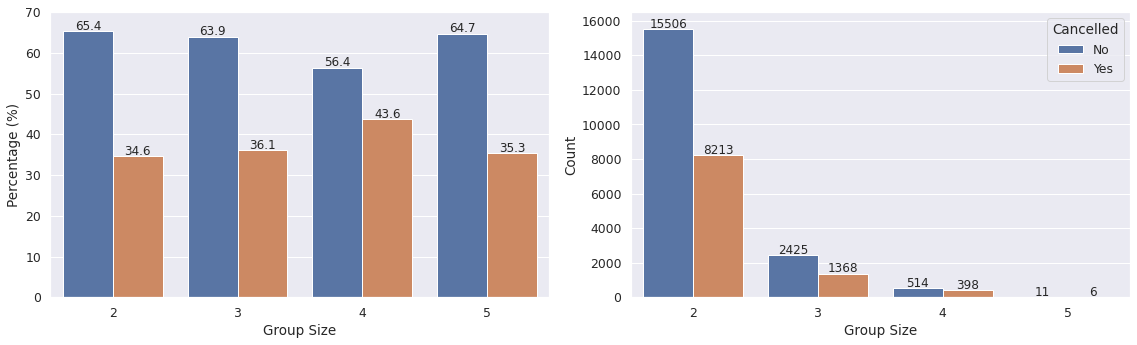

In [59]:
# Studying the impact of the size of group (total no. of people on the reservation) on cancellation status

# Generating a crosstab of special requests and cancellation status
ctab = pd.crosstab(non_single_data['group_size'], non_single_data['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (16, 5));
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'group_size', y = 'value', hue = 'cancelled');
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Group Size');
plt.ylabel('Percentage (%)');
plt.legend().set_visible(False);
plt.ylim(0, 70);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = non_single_data, x = 'group_size', hue = 'cancelled');
countplot_labeling(cntplt, non_single_data, perc = False);
plt.xlabel('Group Size');
plt.ylabel('Count');
plt.legend(title = 'Cancelled', loc = 'upper right');
plt.ylim(0, 16500);
plt.tight_layout();

In [60]:
# Building a temporary dataset for single adult travelers 
df_temp = df.loc[(df.adults == 1) & (df.children == 0)]
print('{}% of single adult guests do not cancel their reservations'.format(
      round(df_temp.loc[df_temp.cancelled == 'No'].shape[0]/df_temp.shape[0]*100, 2)))

76.04% of single adult guests do not cancel their reservations


#### Observations:

*   Among all group sizes, group size = 4 has the highest cancellation rate, but, in general, no. of people on the reservation (for non-single guests) doesn't have much impact on the cancellation rate, and for most group sizes, the cancellation rate is just slightly more than 32.8% (the cancellation rate of the full data). 

*   As seen above, the numbers for single adult travelers are noticeably different, and only ~ 24% of them cancel their reservations.

**`Cancellation Status vs. Repeated Guest`**

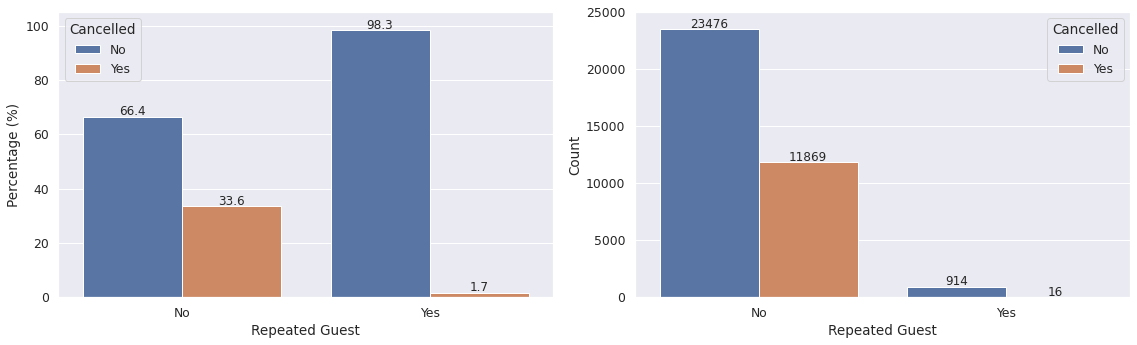

In [61]:
# Generating a crosstab of repeated guest status and cancellation status
ctab = pd.crosstab(df['repeated_guest'], df['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (16, 5));
plt.subplot(121);
barplt = sns.barplot(data = ctab_df, x = 'repeated_guest', y = 'value', hue = 'cancelled');
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Repeated Guest');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Cancelled', loc = 'upper left');
plt.ylim(0, 105);
# Plotting crosstab in count form
plt.subplot(122);
cntplt = sns.countplot(data = df, x = 'repeated_guest', hue = 'cancelled');
countplot_labeling(cntplt, df, perc = False);
plt.xlabel('Repeated Guest');
plt.ylabel('Count');
plt.legend(title = 'Cancelled', loc = 'upper right');
plt.ylim(0, 25000);
plt.tight_layout();

#### Observations:

However repeated guests constitute a small fraction of the whole data, but their cancellation rate (1.7%) is much lower than those of the full data and the new guests. This is good news for the hotel chain, as it indicates that it's established a strong customer loyalty with its frequent guests.

**`Number of Cancelled and Visiting Guests vs. Month`**

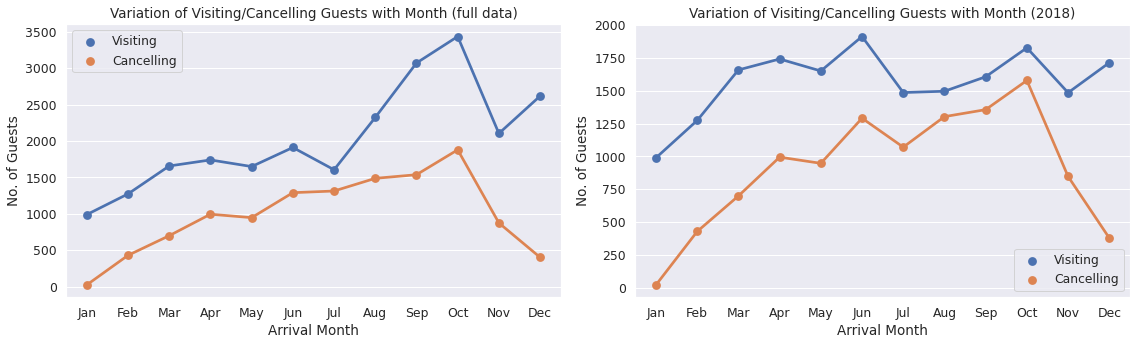

In [62]:
# Generating a crosstab of arrival months and cancellation status (full data)
ctab_full = pd.crosstab(df['arrival_month'], df['cancelled'])
# Converting the crosstab into a dataframe
ctab_full_df = ctab_full.stack().reset_index()
ctab_full_df.rename(columns = {'cancelled': '', 0: 'value'}, inplace = True) 
ctab_full_df.replace(['No', 'Yes'], ['Visiting', 'Cancelling'], inplace = True)

# Generating a crosstab of arrival months and cancellation status (2018)
ctab_2018 = pd.crosstab(df.loc[df.arrival_year == 2018]['arrival_month'], 
                        df.loc[df.arrival_year == 2018]['cancelled'])
# Converting the crosstab into a dataframe
ctab_2018_df = ctab_2018.stack().reset_index()
ctab_2018_df.rename(columns = {'cancelled': '', 0: 'value'}, inplace = True) 
ctab_2018_df.replace(['No', 'Yes'], ['Visiting', 'Cancelling'], inplace = True)


# Plotting the variation of no. of visiting and cancelling guests with month (full data)
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.pointplot(data = ctab_full_df, x = 'arrival_month', y = 'value', hue = '',
              order = calendar.month_abbr[1:13]);
plt.xlabel('Arrival Month');
plt.ylabel('No. of Guests');
plt.title('Variation of Visiting/Cancelling Guests with Month (full data)');
# Plotting the variation of no. of visiting and cancelling guests with month (2018)
plt.subplot(122);
sns.pointplot(data = ctab_2018_df, x = 'arrival_month', y = 'value', hue = '',
              order = calendar.month_abbr[1:13]);
plt.xlabel('Arrival Month');
plt.ylabel('No. of Guests');
plt.title('Variation of Visiting/Cancelling Guests with Month (2018)');
plt.tight_layout();

#### Observations:

*   When only looking at the 2018 data, June has the highest number of visitors (busiest month), slightly greater than the no. of visitors in October, but when looking at the full data, October becomes the busiest month for the hotels chain. In both scenarios, October sees the highest number of cancellations.

*   January has the smallest numbers of visitors and cancelled reservations, regardless of separating data by year or not.

*   Generally, fewer number of guests should be expected in colder months. There is some growth in no. of visitors in December, due to holidays, but this is an exception. 

**`Percentage of Cancelled Reservations vs. Month`**

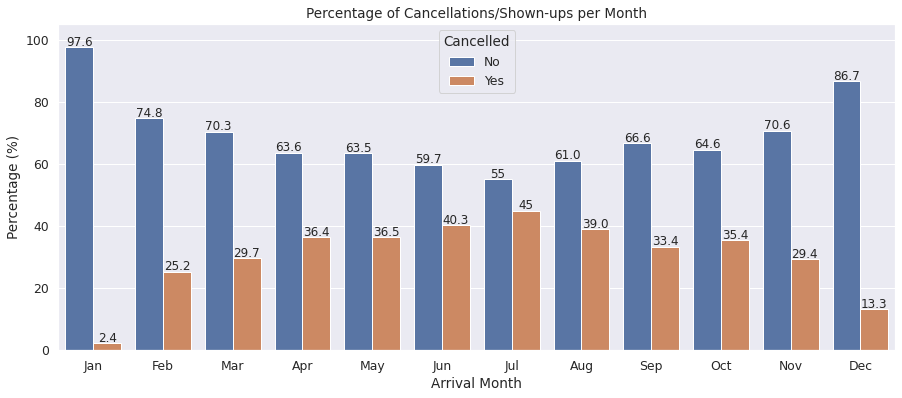

In [63]:
# Let's first look at full data

# Generating a crosstab of repeated guest status and cancellation status
ctab = pd.crosstab(df['arrival_month'], df['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (15, 6));
barplt = sns.barplot(data = ctab_df, x = 'arrival_month', y = 'value', hue = 'cancelled',
                     order = calendar.month_abbr[1:13]);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Arrival Month');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Cancelled', loc = 'upper center');
plt.ylim(0, 105);
plt.title('Percentage of Cancellations/Shown-ups per Month');

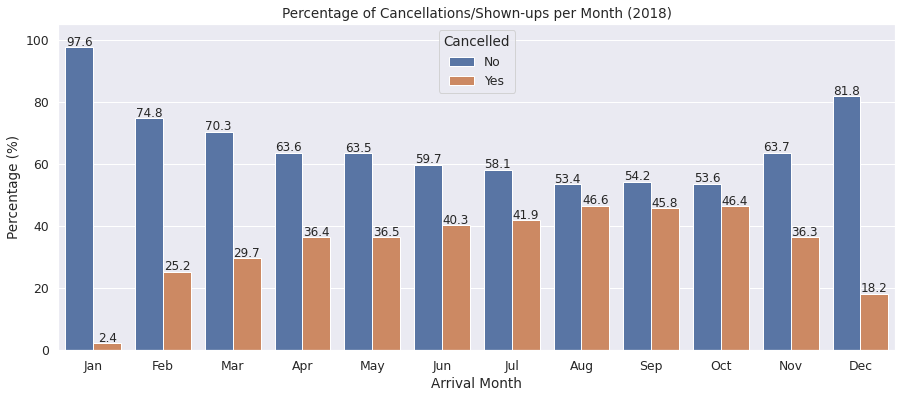

In [64]:
# Now let's look at 2018 data

# Generating a crosstab of repeated guest status and cancellation status
ctab = pd.crosstab(df.loc[df.arrival_year == 2018]['arrival_month'], 
                   df.loc[df.arrival_year == 2018]['cancelled'], normalize = 'index')
# Converting the crosstab into a dataframe
ctab_df = ctab.stack().reset_index()
ctab_df.rename(columns = {0: 'value'}, inplace = True)
ctab_df['value'] = ctab_df['value']*100

# Plotting crosstab in percentage form
plt.figure(figsize = (15, 6));
barplt = sns.barplot(data = ctab_df, x = 'arrival_month', y = 'value', hue = 'cancelled',
                     order = calendar.month_abbr[1:13]);
countplot_labeling(barplt, ctab_df, perc = False);
plt.xlabel('Arrival Month');
plt.ylabel('Percentage (%)');
plt.legend(title = 'Cancelled', loc = 'upper center');
plt.ylim(0, 105);
plt.title('Percentage of Cancellations/Shown-ups per Month (2018)');

#### Observations:
*   When looking at the full data, July and June turn out to be the top two months (in that order) with the highest cancellation rates. The 2018 data, on the other hand, reveals that August and October have the highest cancellation rates, respectively. Note that even in this case, July and June have high cancellation rates (> 40%).

*  In both scenarios, January and December have the lowest cancellation rates. Basically, only 2.4% of bookings in January have got cancelled. 

*  Seemingly, people traveling in the warmer months (especially the vacation season of summer) are less committed to their reservations than those in the colder months (winter). It can be either because people change their minds about their summer vacations more often, or prices are more competitive around that time and they find somewhere cheaper.  

**`Price vs. Month`**

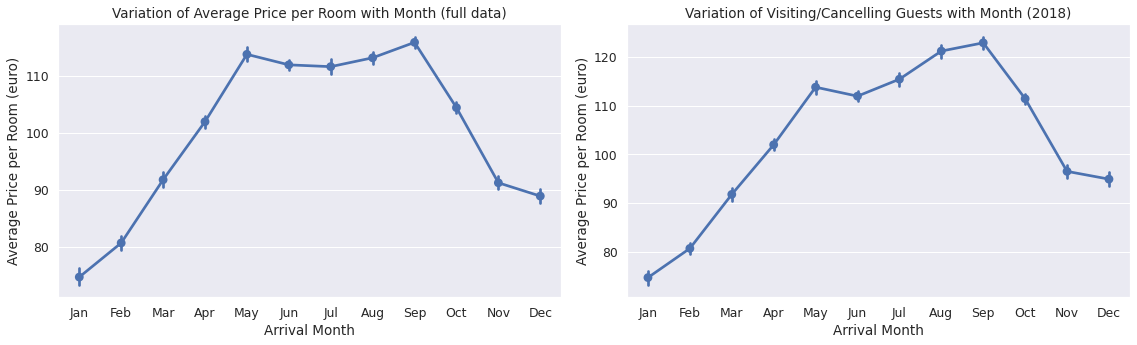

In [65]:
# Variation of average room price with month (full data)
plt.figure(figsize = (16, 5));
plt.subplot(121);
sns.pointplot(data = df, x = 'arrival_month', y = 'avg_room_price',
              order = calendar.month_abbr[1:13]);
plt.xlabel('Arrival Month');
plt.ylabel('Average Price per Room (euro)');
plt.title('Variation of Average Price per Room with Month (full data)');
# Variation of average room price with month (2018)
plt.subplot(122);
sns.pointplot(data = df.loc[df.arrival_year == 2018], x = 'arrival_month', y = 'avg_room_price',
              order = calendar.month_abbr[1:13]);
plt.xlabel('Arrival Month');
plt.ylabel('Average Price per Room (euro)');
plt.title('Variation of Visiting/Cancelling Guests with Month (2018)');
plt.tight_layout();

#### Observations:
*   The dynamic price begins to rise as we move into warmer months. It peaks once in late spring (May), remains high the entire summer, with the maximum price appearing in September, and as we move away from the vacation season and enter the cooler months of the year, the average price per room rapidly declines.

*   The same overall conclusion can be drawn for 2018 as well, with some minor exceptions. For instance, August replaces May as the month with the second highest average room price, while September remains the month with maximum room price.

## Data Preprocessing

*   **Missing value treatment**: As established before, the dataset doesn't have any missing values, therefore it doesn't require any forms of missing value treatment.

*   **Outlier detection and treatment**: We performed most of outlier treatment in the previous steps. Nonetheless, we will explore the possible outliers of numerical variables once more, and examine how previous treatments might have changed the distribution of altered variables.

*  **Feature engineering**: We do not engineer any new feature, but we'll drop some of the unnecessary ones that we temporarily introduced, and convert some of the categorical variables with ordered classes into numerical variables.


### Outlier Check 

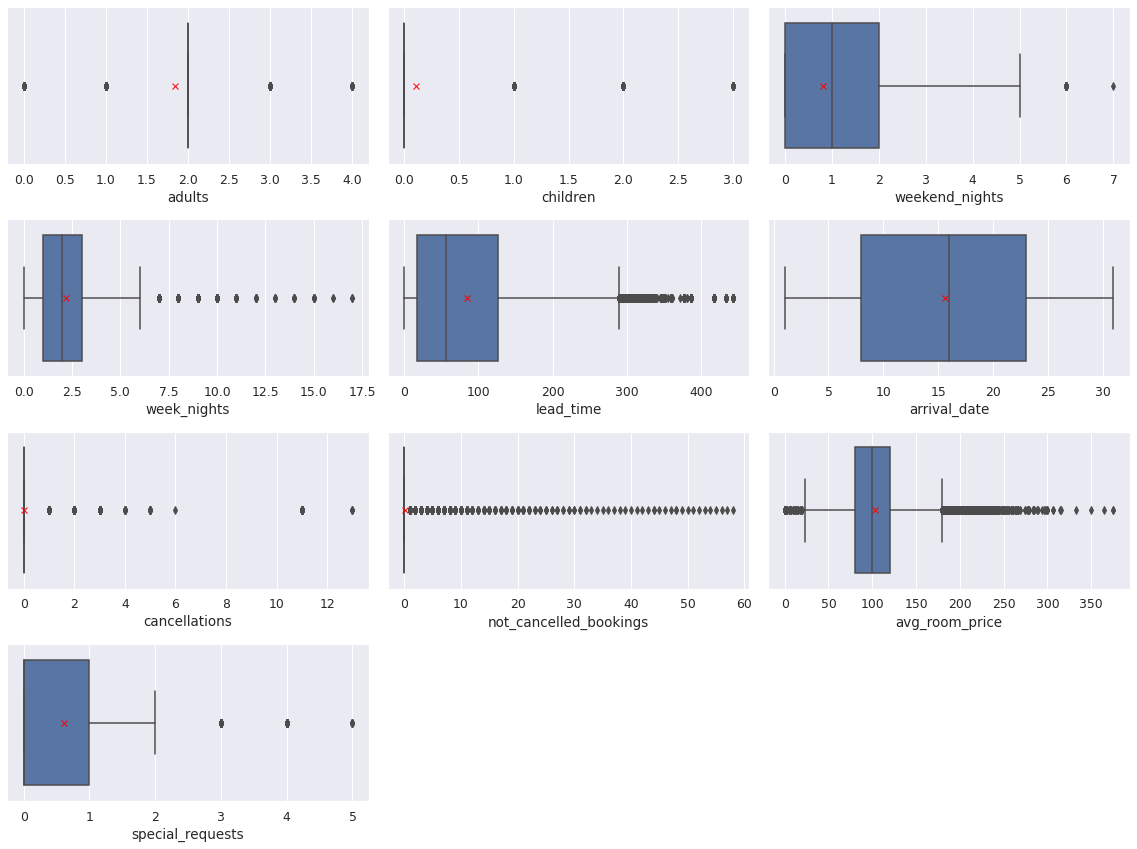

In [66]:
# Making a list of all numerical features
num_cols = df.select_dtypes(include = np.number).columns.tolist()

# Showing the boxplots of numerical features
plt.figure(figsize = (16, 12));
for i, col in enumerate(num_cols):
  plt.subplot(4, 3, i+1);
  sns.boxplot(data = df, x = col, showmeans = True, 
              meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '6'});        
plt.tight_layout()        

#### Observations:

*   Several outliers in the number of previous shown-ups and cancellations are expected, as most guests are new, making zero the overwhelming input of this variable, thereby turning its boxplot into a line.

*   We've already made some alterations to no. of children, the week nights (for tatal booked nights = 0) and average room price (for one very expensive booking with the price > 500), in cases that the entries were too unreasonable. The remainder of outliers seem expected, logical, not too distant from the rest of the data and in reality part of it. Therefore, we do not intend to carry out any further outlier treatment beyond what we've done previously.



### Feature Engineering 

Here, we will drop some of the unhelpful/temporary variables, replace the entries of cancellation status by a 0 and 1, and will convert categorical variables with logical (mathematical) orders into numerical variables. 

In [67]:
# Let's drop useless/temporary variables
df_model = df.drop(columns = ['arrival_date', 'special_requests_cat'], axis = 1)

#### Notes:
Arrival date was dropped, as we exhibited that different days of a month do not have any significance over each other.

In [68]:
# Making a list of months with December appearing first
months_list = calendar.month_abbr[1:12]
months_list.insert(0, 'Dec')

# Let's convert meal plan and room type into numerical variables (shown to be ordered based on price)
df_model['meal_plan'].replace(['None', 'Plan 1', 'Plan 2', 'Plan 3'], [1, 2, 3, 4], inplace = True) 
df_model['room_type'].replace(sorted(df_model.room_type.unique().tolist()), np.arange(1, 8), inplace = True) 
df_model['arrival_month'].replace(months_list, np.arange(1, 13), inplace = True) 

# Let's make cancellation status a 0/1 variable
df_model['cancelled'].replace(['No', 'Yes'], [0, 1], inplace = True) # Making cancellation status numerical

#### Notes:
Here, December was set as the first month, so that all cold months of year with lower cancellation rates will be consecutively next to each other. 

### Post-imputation EDA (brief)

- Here, we take a second look at the frequency and distribution plots of variables that were altered during previous steps.

**`Average Price per Room`**

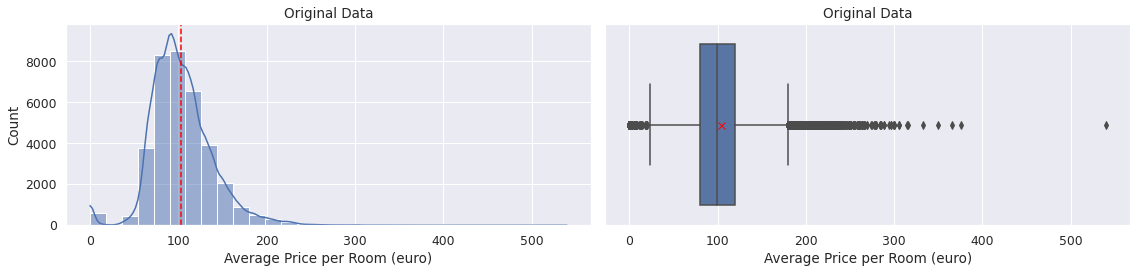

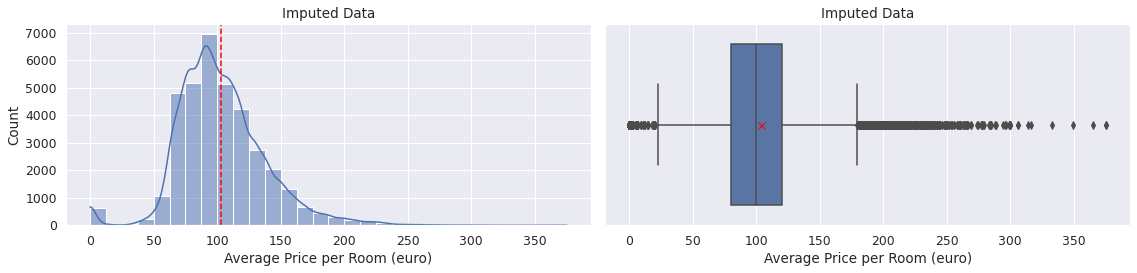

In [69]:
# Plotting the distribution of average room prices

# mean values
mv = data_orig['avg_price_per_room'].mean()
mv_imputed = df['avg_room_price'].mean()

# Histogram and boxplot for original data
plt.figure(figsize = (16, 4));
plt.subplot(121);
sns.histplot(data = data_orig, x = 'avg_price_per_room', kde = True, bins = 30);
plt.axvline(mv, color = 'red', linestyle = '--');
plt.xlabel('Average Price per Room (euro)');
plt.title('Original Data');
plt.subplot(122);
sns.boxplot(data = data_orig, x = 'avg_price_per_room', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.title('Original Data');
plt.tight_layout();

# Histogram and boxplot for imputed data
plt.figure(figsize = (16, 4));
plt.subplot(121);
sns.histplot(data = df, x = 'avg_room_price', kde = True, bins = 30);
plt.axvline(mv_imputed, color = 'red', linestyle = '--');
plt.xlabel('Average Price per Room (euro)');
plt.title('Imputed Data');
plt.subplot(122);
sns.boxplot(data = df, x = 'avg_room_price', showmeans = True, 
            meanprops = {'marker': 'x', 'markerfacecolor': 'red', 'markeredgecolor': 'red', 'markersize': '7'});
plt.xlabel('Average Price per Room (euro)');
plt.title('Imputed Data');
plt.tight_layout();

#### Observations:
The only change here is the replacement of the original maximum (540) by the second largest number (375.5).

**`No. of Children`**

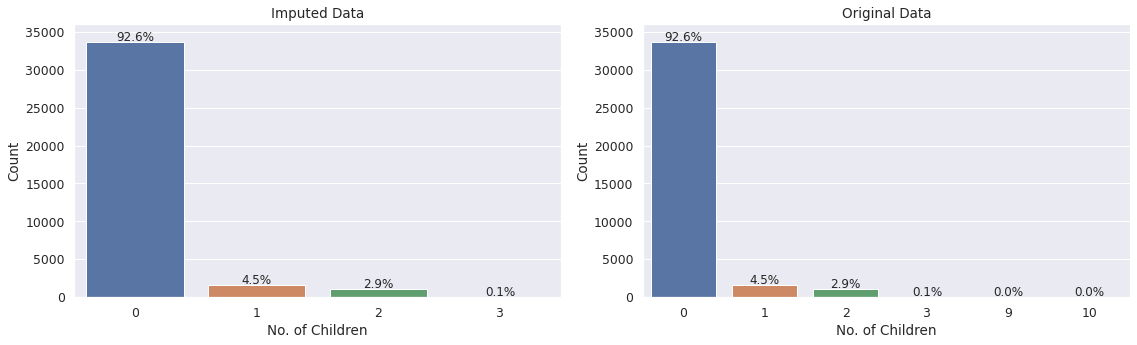

In [70]:
# Plotting the frequency of number of children in the booking (after changes)
plt.figure(figsize = (16, 5));
plt.subplot(121);
cntplt1 = sns.countplot(data = df, x = 'children');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt1, df);
plt.title('Imputed Data');
plt.ylim(0, 36000);

# Plotting the frequency of number of children in the booking (before changes)
plt.subplot(122);
cntplt2 = sns.countplot(data = data_orig, x = 'no_of_children');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt2, data_orig);
plt.title('Original Data');
plt.ylim(0, 36000);
plt.tight_layout();

#### Observations:

The only change here is the substitution of strangely large children numbers (9 and 10) by the next biggest number (3). This hasn't visibly changed the percentages, as only three entries had more than three kids.

**`No. of Reserved Weekend Nights`**

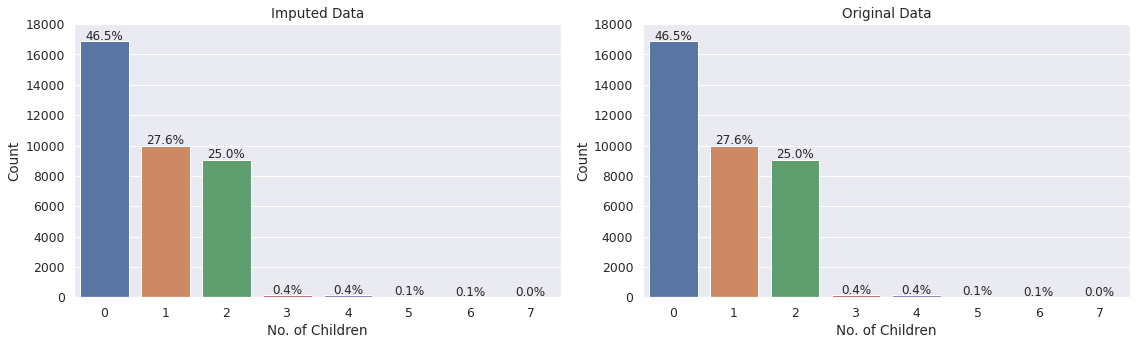

In [71]:
# Plotting the frequency of number of children in the booking (after changes)
plt.figure(figsize = (16, 5));
plt.subplot(121);
cntplt1 = sns.countplot(data = df, x = 'weekend_nights');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt1, df);
plt.title('Imputed Data');
plt.ylim(0, 18000);

# Plotting the frequency of number of children in the booking (before changes)
plt.subplot(122);
cntplt2 = sns.countplot(data = data_orig, x = 'no_of_weekend_nights');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt2, data_orig);
plt.title('Original Data');
plt.ylim(0, 18000);
plt.tight_layout();

#### Observations:
Since week nights of online segment with zero total night were imputed by 0 (the mode), there is absolutely no change here.

**`No. of Reserved Week Nights`**

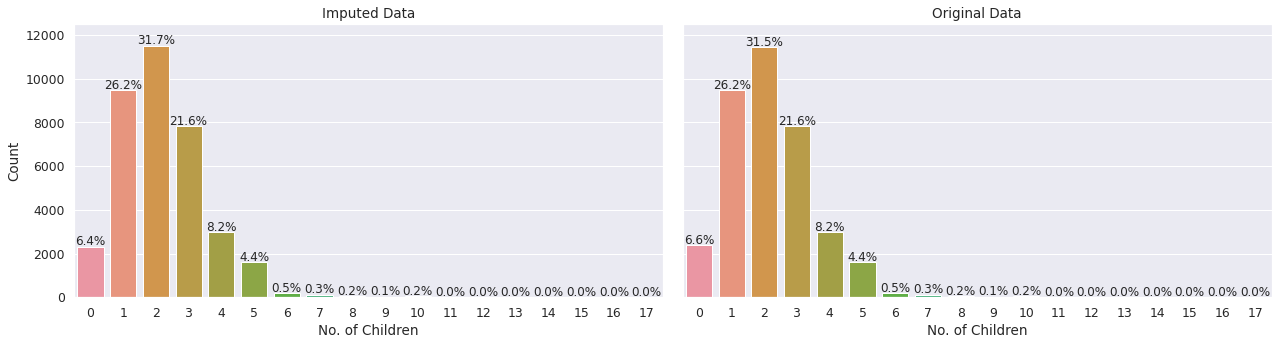

In [72]:
# Plotting the frequency of number of children in the booking (after changes)
plt.figure(figsize = (18, 5));
plt.subplot(121);
cntplt1 = sns.countplot(data = df, x = 'week_nights');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt1, df);
plt.title('Imputed Data');
plt.ylim(0, 12500);

# Plotting the frequency of number of children in the booking (before changes)
plt.subplot(122);
cntplt2 = sns.countplot(data = data_orig, x = 'no_of_week_nights');
plt.xlabel('No. of Children');
plt.ylabel('Count');
countplot_labeling(cntplt2, data_orig);
plt.title('Original Data');
plt.ylabel('');
cntplt2.yaxis.set_ticklabels([]); 
plt.ylim(0, 12500);
plt.tight_layout();

#### Observations:

Since some of the zero values (those of the online segment with zero total night) have been imputed by the mode of online segment week nights (2), the percentage of 0 week night has dropped by 0.2%, and that of 2 week nights has increased by the same amount.

## Logistic Regression Model

*   For both Logistic regression and decision tree models, we divide the dataset into training, validation and testing set with a 70:15:15 ratio. 

*   Training set is used for building the models, validation set is employed for modification/hyperparameter tuning of the built models and the testing set is used to compare all the models with each other, in the last step of the project. 

*   Default threshold for logistic regression models is 0.5.  

### Auxiliary Functions

Here, some additional, in-house functions are introduced to help us with evaluating and improving the performance of classification models (logistic-regression-based or decision-tree-based) in this project.

In [73]:
# Function for checking multicollinearity

def vif_calculator(X, drop_const_dummy = True, data_model = df_model):
  '''This function receives a dataset of predictors and examines the potential
  multicollinearity among them via calculating VIF of each predictor. When
  drop_const_dummy = True, VIF of constant and dummy variables will be dropped.
  data_model indicates the dataset used for building the model.'''

  orig_cols = df_model.columns.tolist() # columns of the dataset used for building the model
  const_dummy_index = []  # finding the index of predictors that are intercept or dummy
  for i, col in enumerate(X.columns.tolist()):
    if(not (col in orig_cols)):
      const_dummy_index.append(i)

  vif_df = pd.DataFrame({'Predictor': X.columns.tolist(), 
                         'VIF': np.zeros(len(X.columns.tolist()))}) 

  # Calculating VIFs of all predictors
  for i, col in enumerate(X.columns.tolist()):
    vif_df.loc[i, 'VIF'] = variance_inflation_factor(X.values, i)

  # dropping rows corresponding to intercept and dummy vars if drop_const_dummy = True
  if(drop_const_dummy == True):
    vif_df.drop(index = const_dummy_index, axis = 0, inplace = True)  
    vif_df.reset_index(drop = True, inplace = True)  

  return vif_df

In [74]:
# Function for treating multicollinearity

def vif_treatment(X, y, model, thresh = 0.5, data_model = df_model):
  '''This function receives predictors, target and predictive model and evaluates
  how the removal of each feature with a high VIF value would change the performance 
  of the model. data_model indicates the dataset used for building the model.'''

  y_pred = model.predict(X) > thresh
  y_pred = np.round(y_pred)

  orig_cols = df_model.columns.tolist() # columns of the dataset used for building the model
  const_dummy_cols = []  # finding predictors that are intercept or dummy
  for col in X.columns.tolist():
    if(not (col in orig_cols)):
      const_dummy_cols.append(col)

  # Making a dataframe of predictors with large VIFs and the impact of thier removal on the model
  vif_treatment_df = pd.DataFrame({'Dropped Column': [], 'Updated Accuracy': [], 'Updated Recall': []}) 

  cnt = -1
  # checking for predictors with VIF > 5 that aren't intercept or dummy variable
  for i, col in enumerate(X.columns.tolist()):
    vif = variance_inflation_factor(X.values, i)
    if(vif > 5 and not (col in const_dummy_cols)):
      cnt += 1
      vif_treatment_df.loc[cnt, 'Dropped Column'] = col
      X_temp = X.drop(columns = col, axis = 1)
      model_temp = (sm.Logit(y, X_temp.astype(float))).fit(maxiter = 10000, disp = False)
      y_pred_temp = model_temp.predict(X_temp) > thresh
      y_pred_temp = np.round(y_pred_temp)
      vif_treatment_df.loc[cnt, 'Updated Accuracy'] = accuracy_score(y, y_pred)
      vif_treatment_df.loc[cnt, 'Updated Recall'] = recall_score(y, y_pred)

  return vif_treatment_df

In [75]:
# Function for removing statistically insignificant predictors

def highp_removal(X, y):
  '''This function receives predictors, target and predictive model and begin
  to remove predictors with p-values >= 0.05 (from the highest to the lowest),
  until a model with no statistically insignificant predictors is obtained.
  It returns all features that need to be dropped to achieve such model. As
  intercept is crucial for linear models, the constant will never be dropped.'''

  # Making a list of all statistically insignificant predictors
  highp_cols = []

  model = (sm.Logit(y, X.astype(float))).fit(maxiter = 10000, disp = False)

  # checking for predictors with p-value >= 0.05 that aren't intercept
  while(model.pvalues.max() >= 0.05):
    col_pmax = model.pvalues.idxmax()  # predictor with highest p-value
    if(col_pmax == 'const'):
      continue
    else:
      highp_cols.append(col_pmax)
      X = X.drop(columns = col_pmax, axis = 1)
      model = (sm.Logit(y, X.astype(float))).fit(maxiter = 10000, disp = False)

  return highp_cols

In [76]:
# Function for evaluating model's performance

def model_eval(model, X_train, y_train, X_test, y_test, valid = True, thresh = 0.5):
  '''This model calculates all relevant performance metrics of a classification
  model on train and test (validation) data, and returns them in the form of a
  dataframe. valid = True means a validation set has been passed, as opposed to a
  training set.'''

  # Reconstructing the training data
  y_recon = model.predict(X_train) > thresh
  y_recon = np.round(y_recon)

  # Making prediction for the testing (validation) data
  y_pred = model.predict(X_test) > thresh
  y_pred = np.round(y_pred)

  # Setting the indices of the performance dataframe
  if valid:
    df_indices = ['Train', 'Validation']
  else:
    df_indices = ['Train', 'Test']

  # Setting the column names of the performance dataframe
  performance_df = pd.DataFrame(index = df_indices, columns = ['Accuracy', 'Recall', 
                                                               'Precision', 'F1', 'Specificity'])
  # Filling in the performance metrics on the training set
  performance_df.iloc[0, :] = [accuracy_score(y_train, y_recon), recall_score(y_train, y_recon),
                              precision_score(y_train, y_recon), f1_score(y_train, y_recon),
                              recall_score(y_train, y_recon, pos_label = 0)]
  # Filling in the performance metrics on the testing (validation) set
  performance_df.iloc[1, :] = [accuracy_score(y_test, y_pred), recall_score(y_test, y_pred),
                              precision_score(y_test, y_pred), f1_score(y_test, y_pred),
                              recall_score(y_test, y_pred, pos_label = 0)]                            
  return performance_df

In [77]:
# Generating the confusion matrix for a classification mode

def make_confusion_matrix(y_truth, y_pred):
  
  # Making the model's 2*2 confusion matrix 
  cm = confusion_matrix(y_truth, y_pred)

  # Turning the confusion matrix into a dataframe
  cm_df = pd.DataFrame(cm, index = ['Truth - No', 'Truth - Yes'], 
                       columns = ['Prediction - No', 'Prediction - Yes'])
  
  cm_label = []
  # Generating the label of the heatmap
  for i in range(len(cm.flatten())):
    cm_label.append(str(cm.flatten()[i]) + '\n(' + str(np.round(cm.flatten()[i]/cm.flatten().sum()*100, 2)) +'%)')
  cm_label = np.asarray(cm_label)
  cm_label = cm_label.reshape(2, 2)

  # Plotting the confusiin matrix in the form of a heatmap
  sns.heatmap(cm_df, fmt = '', annot = cm_label, cmap = 'seismic', cbar = False,
              vmin = -len(y_truth), vmax = len(y_truth));
  plt.xlabel('Prediction');
  plt.ylabel('Truth');

### Preparing Data and Building Initial Model

In [78]:
# Splitting the dataset into predictors (X) and target (y)
X = df_model.drop(columns = 'cancelled', axis = 1) 
y = df_model['cancelled'] 

# Adding the intercept to predictors
X = add_constant(X)

# Converting categorical features into dummy variables
X = pd.get_dummies(X, columns = X.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first = True)

In [79]:
# Building training, validation and testing sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size = 0.7, stratify = y,
                                                      random_state = 1, shuffle = True)
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, test_size = 0.5, stratify = y_valid,
                                                    random_state = 1, shuffle = True)

In [80]:
# Ensuring cancellation status has been divided into different sets with the same proportion
print('Cancellation status in training set:\n' + str(y_train.value_counts(1)), end = '\n'*2)
print('Cancellation status in validation set:\n' + str(y_valid.value_counts(1)), end = '\n'*2)
print('Cancellation status in testing set:\n' + str(y_test.value_counts(1)), end = '\n'*2)

Cancellation status in training set:
0   0.672
1   0.328
Name: cancelled, dtype: float64

Cancellation status in validation set:
0   0.672
1   0.328
Name: cancelled, dtype: float64

Cancellation status in testing set:
0   0.672
1   0.328
Name: cancelled, dtype: float64



In [81]:
# Building the initial logistic regression model
lg_model1 = (sm.Logit(y_train, X_train.astype(float))).fit(maxiter = 10000)
print(lg_model1.summary()) 

Optimization terminated successfully.
         Current function value: 0.421592
         Iterations 1757
                           Logit Regression Results                           
Dep. Variable:              cancelled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.3334
Time:                        17:16:54   Log-Likelihood:                -10705.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           -3.9998      0.286    -13.984      0.

#### Notes:

*   We increased the number of iterations in 'fit' from the default value, to ensure the obtained model is converged, although except for market_segment_Complimentary, the parameters of no predictor really changes, even if it was kept at default value.

*   Note that there are only a few data points with complimentary market segment, none of which from cancelled = 1 class, which is the main source of convergence problem on this variable. It will turn out later that market_segment_Complimentary is a statistically insignifcant variable, resolving this issue on the final model.


### Examining the Performance of the Original Model

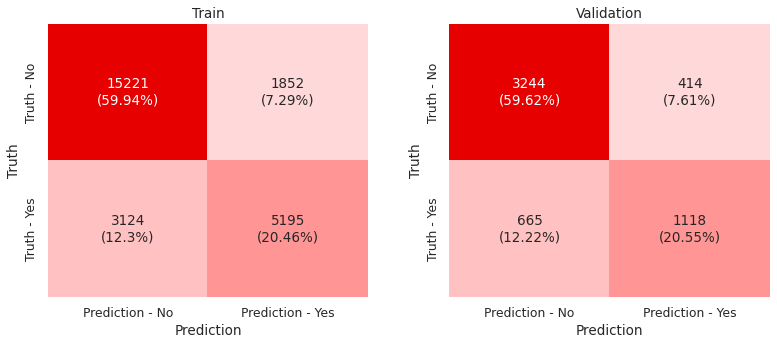

In [82]:
# Generating the confusion matrices for training and validation sets

# Reconstructing the training set
y_recon = lg_model1.predict(X_train) > 0.5
y_recon = np.round(y_recon)

# Forecasting the validation set
y_pred = lg_model1.predict(X_valid) > 0.5
y_pred = np.round(y_pred)

# Plotting confusion matrices
plt.figure(figsize = (11, 5))
plt.subplot(121);
make_confusion_matrix(y_train, y_recon)
plt.title('Train');
plt.subplot(122);
make_confusion_matrix(y_valid, y_pred)
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [83]:
# Displaying the performance metrics on train and validation sets
lg1_performance = model_eval(lg_model1, X_train, y_train, X_valid, y_valid)
lg1_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.804,0.624,0.737,0.676,0.892
Validation,0.802,0.627,0.730,0.675,0.887


#### Observations:

*   On the bright side, the performance metrics on training and validation sets are fairly close to one another, indicating overfitting has been mostly avoided, but unfortunately, only about 63% of all cancellations have been recalled. 

*   Note that, recall is the most important performance measure if only reducing the number and undesired cost of cancellations is sought, as it indicates what fraction of cancellations have been captured by the model. 

*   On the other hand, F1 score becomes important if the hotel chain wants to have a balance between reducing the cost of last-minute cancellations and not losing business opportunities by erroneously assuming a solid reservation will be cancelled. This measure attempts to keep both recall and precision high and close.

*   In the following, we'll consider both possibilities, and will develop models that improve recall, and models that keep F1 high. 

*   These will be achieved by further adjustments on the model (removing statistically insignificant predictors) and optimizing threshold based on ROC (increasing recall) or precision-recall (increasing F1) curves.

### Checking Multicollinearity

In [84]:
# Checking multicollinearity for numerical predictors
vif_table1 = vif_calculator(X_train, drop_const_dummy = True)
vif_table1

,Predictor,VIF
0,adults,1.344
1,children,1.299
2,weekend_nights,1.064
3,week_nights,1.087
4,meal_plan,1.397
5,room_type,1.554
6,lead_time,1.376
7,arrival_month,1.226
8,cancellations,1.320
9,not_cancelled_bookings,1.569


In [85]:
# Ensuring there is no nan or inf in vifs (including intercept and dummy vars)
all_vifs = vif_calculator(X_train, drop_const_dummy = False).VIF

print('No. of predictors with NaN VIFs:', all_vifs.isnull().sum())
print('No. of predictors with inf VIFs:', all_vifs.loc[all_vifs == np.inf].shape[0])

No. of predictors with NaN VIFs: 0
No. of predictors with inf VIFs: 0


#### Observations:

There is no multicollinearity between any sets of predictors, and VIF for intercept and dummy variables remains a finite and defined value. Therefore, no multicollinearity problem can be reported. 

### Removing Statistically Insignificant Predictors

*   As seen before, the p-value for some predictors is >= 0.05. We leverage our in-house function to detect and then remove the statistically insignificant variables.

*   Note that there is no dummy variable for which all categories have p-value >= 0.05. Therefore higp-removal() can be used instantly, and without the need for the initial removal of an entire dummy variable all at once.

In [86]:
# Detecting all statistically insignificant predictors
highp_cols = highp_removal(X_train, y_train)
highp_cols

['market_segment_Complimentary',
 'children',
 'market_segment_Corporate',
 'not_cancelled_bookings',
 'meal_plan']

In [87]:
# Removing high-p-value cols from training, validation and testing data
X_train2 = X_train.drop(columns = highp_cols, axis = 1)
X_valid2 = X_valid.drop(columns = highp_cols, axis = 1)
X_test2  = X_test.drop(columns = highp_cols, axis = 1)
y_train2 = y_train.copy()
y_valid2 = y_valid.copy()
y_test2  = y_test.copy()

# Rebuilding the model with no statistically insignificant predictors
lg_model2 = (sm.Logit(y_train2, X_train2.astype(float))).fit(maxiter = 10000)
print(lg_model2.summary())

Optimization terminated successfully.
         Current function value: 0.422157
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              cancelled   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25377
Method:                           MLE   Df Model:                           14
Date:                Thu, 15 Sep 2022   Pseudo R-squ.:                  0.3325
Time:                        17:17:13   Log-Likelihood:                -10719.
converged:                       True   LL-Null:                       -16060.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -4.5760      0.128    -35.749      0.000      -4.827      

### Model Performance After Removal of Statistically Insighnificant Variables

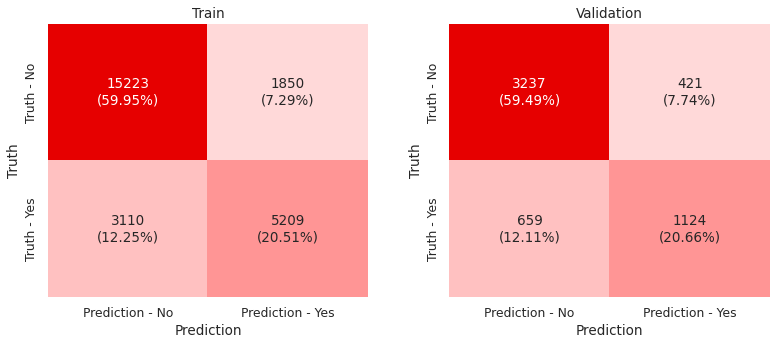

In [88]:
# Generating the confusion matrices for training and validation sets

# Reconstructing the training set
y_recon = lg_model2.predict(X_train2) > 0.5
y_recon = np.round(y_recon)

# Forecasting the validation set
y_pred = lg_model2.predict(X_valid2) > 0.5
y_pred = np.round(y_pred)

# Plotting confusion matrices
plt.figure(figsize = (11, 5))
plt.subplot(121);
make_confusion_matrix(y_train2, y_recon)
plt.title('Train');
plt.subplot(122);
make_confusion_matrix(y_valid2, y_pred)
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [89]:
# Displaying the performance metrics on train and validation sets
lg2_performance = model_eval(lg_model2, X_train2, y_train2, X_valid2, y_valid2)
lg2_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.805,0.626,0.738,0.677,0.892
Validation,0.802,0.630,0.728,0.675,0.885


#### Observations:

Removing features with p-value >= 0.05 has slightly reduced the recall score of the model on both training and validation data.

### Finding Optimal Thresholds

Here, we use ROC and precision-recall curves to determine thresholds that will maximize the difference between TPR (recall) and FPR, and will make recall and precision scores equal, respectively.

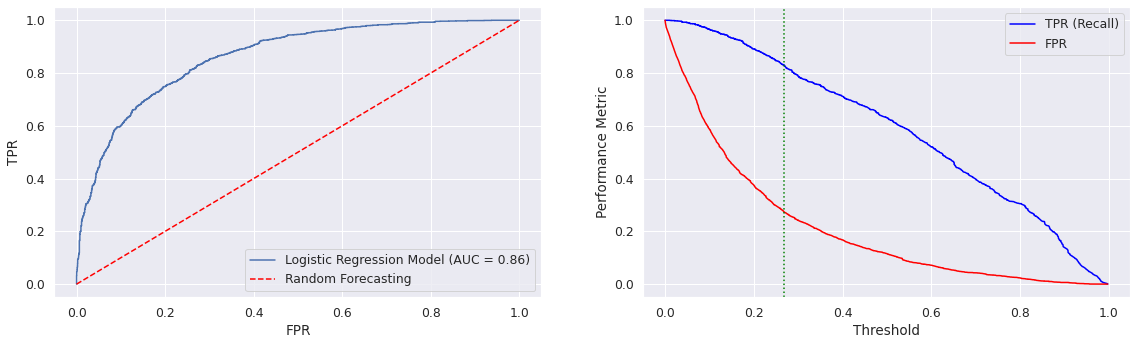

In [90]:
# Evaluating FPR and TPR for lg_model2 as threshold varies
fpr, tpr, tres = roc_curve(y_valid2, lg_model2.predict(X_valid2))
# Calculating AUC score (area under the curve) for lg_model2
AUC = roc_auc_score(y_valid2, lg_model2.predict(X_valid2))

# Determining threshold maximizing the difference between TPR and FPR
opt_roc_tres = tres[np.argmax(tpr - fpr)]  

# Plotting FPR vs. TPR
plt.figure(figsize = (16, 5));
plt.subplot(121);
plt.plot(fpr, tpr);
plt.plot(fpr, fpr, linestyle = '--', color = 'red');
plt.xlabel('FPR');
plt.ylabel('TPR');
plt.legend(['Logistic Regression Model (AUC = {})'.format(np.round(AUC, 2)), 'Random Forecasting']);
# Plotting variation of FPR and TPR with thresholds
plt.subplot(122);
plt.plot(tres[1:], tpr[1:], color = 'blue');
plt.plot(tres[1:], fpr[1:], color = 'red');
plt.axvline(opt_roc_tres, linestyle = ':', color = 'green')
plt.xlabel('Threshold');
plt.ylabel('Performance Metric');
plt.legend(['TPR (Recall)', 'FPR'], loc = 'upper right');
plt.tight_layout(w_pad = 4);

#### Observations:

*   The AUC (Area Under the Curve) for last logistic regression model is fairly high, indicating that it performs much better that random guessing of cancellation status.

*   Ideally, we look for a threshold that has a hight TPR (True Positive Rate), also called recall, and a low FPR (False Positive Rate). Based on above ROC curve, thresh = 0.269 (corresponding to the vertical green lines) is what maximizes the difference between the two.

*   Note that the *validation set* has been used to tune the hyprparameter of threshold, but using training set would also yield almost the same results. The use of validation set (in the absence of cross-validation) is a common practice to tune hyperparameters. Note also that we have an untouched testing set, that will be employed to ensure all the models are suitable for unseen data, do not suffer from overfitting, and their hyperparameters have been set at proper values.  

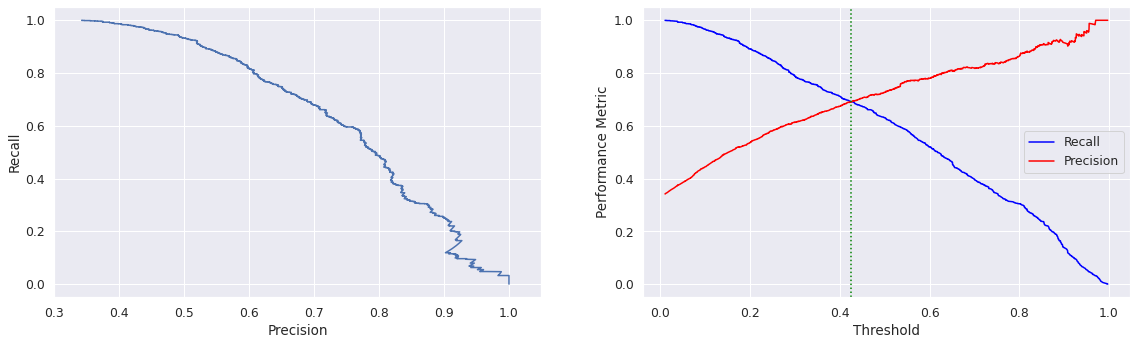

In [91]:
# Evaluating Precision and Recall for lg_model2 as threshold varies
precs, recalls, tres = precision_recall_curve(y_valid2, lg_model2.predict(X_valid2))

# Determining threshold making precision = recall
opt_prec_recall_tres = tres[np.argmin(np.abs(precs - recalls))] 

# Plotting Precision vs. Recall (TPR)
plt.figure(figsize = (16, 5));
plt.subplot(121);
plt.plot(precs, recalls);
plt.xlabel('Precision');
plt.ylabel('Recall');
plt.xlim(0.3, 1.05);
# Plotting variation of FPR and TPR with thresholds
plt.subplot(122);
plt.plot(tres, recalls[:-1], color = 'blue');
plt.plot(tres, precs[:-1], color = 'red');
plt.axvline(opt_prec_recall_tres, linestyle = ':', color = 'green')
plt.xlabel('Threshold');
plt.ylabel('Performance Metric');
plt.legend(['Recall', 'Precision'], loc = 'center right');
plt.tight_layout(w_pad = 4);

#### Observations

*   If not losing opportunities is also important, which it is, F1 score should also be studied and increased. This means both precision and recall should be kept large and close to each other, as much as possible.

*   A low precision means, many bookings that weren't cancelled will be identified as cancelled bookings, making the hotel chain lose lots of business opportunities.

*   For the present logistic regression model, thresh = 0.426 renders precision and recall score equal, giving us the benefits of both worlds.

### Effect of Threshold on the Performance of Logistic Regression

Here, we evaluate the performance of the final logistic regression model as the threshold changes from 0.5 to optimal values. 

In [92]:
# Building the final logistic regression model
X_train_final_lg = X_train2.copy()
y_train_final_lg = y_train2.copy()
X_valid_final_lg = X_valid2.copy()
y_valid_final_lg = y_valid2.copy()
X_test_final_lg  = X_test2.copy()
y_test_final_lg  = y_test2.copy()
lg_model_final   = (sm.Logit(y_train_final_lg, X_train_final_lg.astype(float))).fit(maxiter = 1000, disp = False)

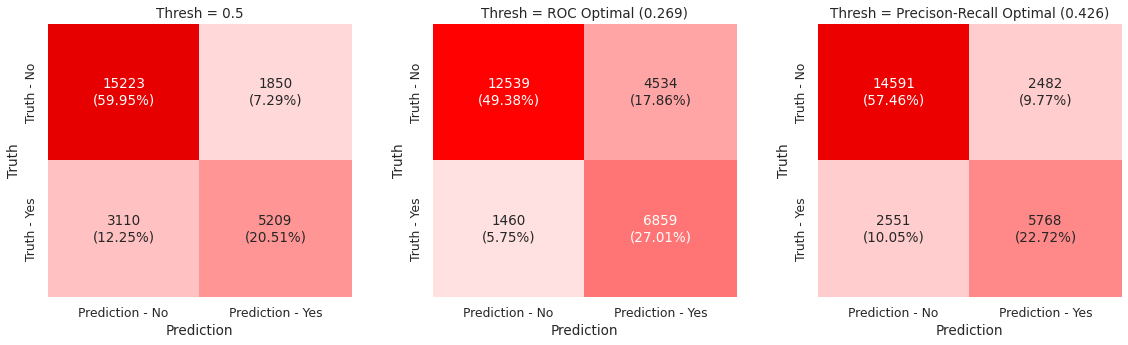

In [93]:
# Generating confusion matrices for training set

# Reconstructing the training set for thresh = 0.5
y_recon_reg = lg_model_final.predict(X_train_final_lg) > 0.5
y_recon_reg = np.round(y_recon_reg)

# Reconstructing the training set for ROC-based optimal threshold
# (the one maximizng TPR - FPR)
y_recon_roc = lg_model_final.predict(X_train_final_lg) > opt_roc_tres
y_recon_roc = np.round(y_recon_roc)

# Reconstructing the training set for precision-recall-based optimal threshold
# (the one for which Precision = Recall)
y_recon_prec_recall = lg_model_final.predict(X_train_final_lg) > opt_prec_recall_tres
y_recon_prec_recall = np.round(y_recon_prec_recall)

# Plotting confusion matrices for training set
plt.figure(figsize = (16, 5))
plt.subplot(131);
make_confusion_matrix(y_train_final_lg, y_recon_reg)
plt.title('Thresh = 0.5');
plt.subplot(132);
make_confusion_matrix(y_train_final_lg, y_recon_roc)
plt.title('Thresh = ROC Optimal ({})'.format(np.round(opt_roc_tres, 3)));
plt.subplot(133);
make_confusion_matrix(y_train_final_lg, y_recon_prec_recall)
plt.title('Thresh = Precison-Recall Optimal ({})'.format(np.round(opt_prec_recall_tres, 3)));
plt.tight_layout(w_pad = 3);

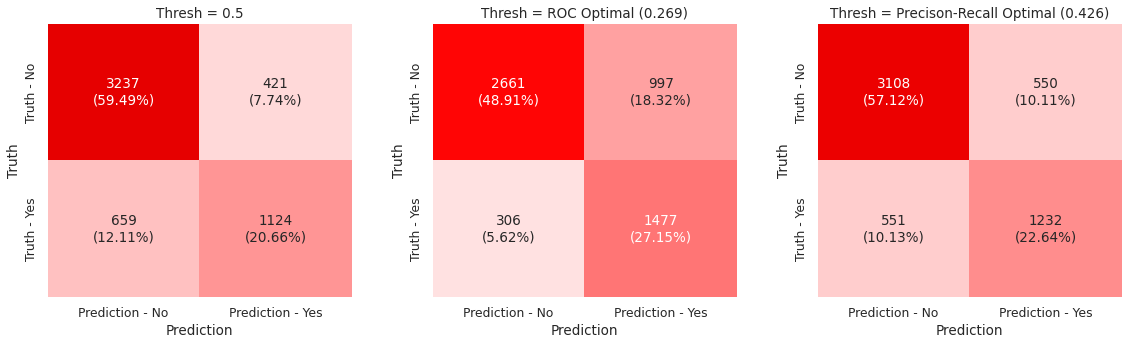

In [94]:
# Generating confusion matrices for validation set

# Predicting the validation set for thresh = 0.5
y_pred_reg = lg_model_final.predict(X_valid_final_lg) > 0.5
y_pred_reg = np.round(y_pred_reg)

# Predicting the validation set for ROC-based optimal threshold
# (the one maximizng TPR - FPR)
y_pred_roc = lg_model_final.predict(X_valid_final_lg) > opt_roc_tres
y_pred_roc = np.round(y_pred_roc)

# Predicting the validation set for precision-recall-based optimal threshold
# (the one for which Precision = Recall)
y_pred_prec_recall = lg_model_final.predict(X_valid_final_lg) > opt_prec_recall_tres
y_pred_prec_recall = np.round(y_pred_prec_recall)

# Plotting confusion matrices for validation set
plt.figure(figsize = (16, 5))
plt.subplot(131);
make_confusion_matrix(y_valid_final_lg, y_pred_reg)
plt.title('Thresh = 0.5');
plt.subplot(132);
make_confusion_matrix(y_valid_final_lg, y_pred_roc)
plt.title('Thresh = ROC Optimal ({})'.format(np.round(opt_roc_tres, 3)));
plt.subplot(133);
make_confusion_matrix(y_valid_final_lg, y_pred_prec_recall)
plt.title('Thresh = Precison-Recall Optimal ({})'.format(np.round(opt_prec_recall_tres, 3)));
plt.tight_layout(w_pad = 3);

#### Observations:

* As expected, more true cancelled reservations are captured, as the threshold is lowered. Note the number and percentage of true positives. We remark that lowering threshold from the default value means that even when model predicts a probability less than 50% for a certain booking, it still might be classified as cancelled. 

* For precision-recall optimal threshold precision = recall, leading to FP = FN, which explains why, in this scenario, the numbers of false positives and false negatives are really close to one another. 

In [95]:
# Calculating performance metrics for different thresholds

# threshold = 0.5
lg_reg_perform = model_eval(lg_model_final, X_train_final_lg, y_train_final_lg, 
                            X_valid_final_lg, y_valid_final_lg)

# thresh = ROC optimal 
lg_roc_perform = model_eval(lg_model_final, X_train_final_lg, y_train_final_lg, 
                            X_valid_final_lg, y_valid_final_lg, thresh = opt_roc_tres)

# thresh = precision-recall optimal 
lg_prec_recall_perform = model_eval(lg_model_final, X_train_final_lg, y_train_final_lg, 
                            X_valid_final_lg, y_valid_final_lg, thresh = opt_prec_recall_tres)

# Merging all performances in one dataframe
lg_perform = pd.concat([lg_reg_perform, lg_roc_perform, lg_prec_recall_perform])

# Separating performances on train, validation and test
lg_perform_train = lg_perform.iloc[0::2]
lg_perform_valid = lg_perform.iloc[1::2]
lg_perform_train.index = ['Thresh = 0.5', 'Thresh = ROC Optimal ({})'.format(round(opt_roc_tres, 3)),
                          'Thresh = Precision-Recall Optimal ({})'.format(round(opt_prec_recall_tres, 3))]
lg_perform_valid.index = ['Thresh = 0.5', 'Thresh = ROC Optimal ({})'.format(round(opt_roc_tres, 3)),
                          'Thresh = Precision-Recall Optimal ({})'.format(round(opt_prec_recall_tres, 3))]

In [96]:
# Comparing the performances of different logistic regression models on training set
lg_perform_train

,Accuracy,Recall,Precision,F1,Specificity
Thresh = 0.5,0.805,0.626,0.738,0.677,0.892
Thresh = ROC Optimal (0.269),0.764,0.824,0.602,0.696,0.734
Thresh = Precision-Recall Optimal (0.426),0.802,0.693,0.699,0.696,0.855


In [97]:
# Comparing the performances of different logistic regression models on validation set
lg_perform_valid

,Accuracy,Recall,Precision,F1,Specificity
Thresh = 0.5,0.802,0.630,0.728,0.675,0.885
Thresh = ROC Optimal (0.269),0.761,0.828,0.597,0.694,0.727
Thresh = Precision-Recall Optimal (0.426),0.798,0.691,0.691,0.691,0.850


#### Observations:

*   As can be seen in the above table, the model with ROC optimal threshold has the highest recall score by far, suggesting that if capturing more cancellations is the objective, it is the best candidate.

*   Accuracy score of the model with threshold = 0.5 is the highest. It is because the combined number of correct predictions it makes for both classes (cancelled and not cancelled) is the largest, but in this project accuracy score is not the best measure. As discussed before, capturing as many more cancellations as possible (maximizing recall), or having a balance between identifying cancellations and not losing opportunities (maximizing F1) are far better objectives. 

*   As anticipated, precision and recall scores are (nearly) identical for precision-recall model. This model lowers threshold in order to increase the desired recall score, but not much, since it doesn't want to hurt precision significantly.

*   The F1 scores of ROC optimal and precision-recall optimal models are quite close to each other and higher than the model with tresh = 0.5. In fact, the ROC optimal model has a higher F1 score on the validation data than the precision-recall optimal model, which is a nice surprise. Regardless, the ROC optimal model has a noticeably lower precision than the two other models.

*   Note that threshold has been tuned on validation set, which is why recall in the ROC optimal model is slightly higher for validation data than training data, or that precision and recall are closer for precision-recall optimal model on validation set, compared to training set. Nonetheless, the performance metrics vary insubstantially between training and validation sets. 

*   We will evaluate all performance metrics again at the end of the project for all models, but this time only for the testing set. 

### Interpretation of Model's Parameters

Suppose b is the coeffcient of a certain predictor in the model. Then **odds = exp(b)**, and **(exp(b) - 1)*100** returns the percentage of the change in the probability of the target variable (here, cancellation), if all other variables remain constant. 

In [98]:
# Creating a dataframe of all predictors' odds
odds_df = pd.DataFrame(index = ['Odds', 'Odds Change (%)'], columns = lg_model_final.params.index.tolist()[1:])
odds_df.loc['Odds', :] = np.exp(lg_model_final.params.values[1:])
odds_df.loc['Odds Change (%)', :] = (np.exp(lg_model_final.params.values[1:]) - 1)*100

odds_df

,adults,weekend_nights,week_nights,room_type,lead_time,arrival_month,cancellations,avg_room_price,special_requests,parking_Yes,arrival_year_2018,market_segment_Offline,market_segment_Online,repeated_guest_Yes
Odds,1.086,1.161,1.038,0.896,1.015,1.071,1.387,1.016,0.211,0.209,2.137,0.417,2.494,0.040
Odds Change (%),8.563,16.091,3.773,-10.427,1.487,7.053,38.655,1.564,-78.856,-79.091,113.705,-58.347,149.378,-95.979


#### Observations:

*   While ***no. of children*** wasn't deemed an important factor by the model, for any more ***adult*** on the booking, the probability of cancellation increases by ~8.6%.
*   Any more ***week night*** of stay increases the chance of cancellation by ~4%, while any more ***weekend nights*** increases it by ~16%. 
*   Every single unit increase in the ***room type no.*** lowers the chance of cancellation by more than 10%, which is expected, since rooms of higher types are more expensive, and more expensive rooms get cancelled more often.
*   With every day of ***lead time***, the chance of cancellation rises by 1.49%. This means that one month of additional lead time increases the probability of cancellation by more than 55%.
*   By moving one month from a colder ***arrival month*** to a warmer one, the chance of cancellation goes up ~7%. Note that, as shown in EDA, the variations of price, cancellation rate, etc. with month are fairly nonlinear and have ups and downs. So this number may not stand for every single month.
*   An additional ***canncellation in the past*** can be translated into ~39% higher chance of cancellation for the current booking. No. of ***previous shown-ups*** wasn't deemed too significant by the model, perhaps because it didn't apply to the vast majority of the guests.
*   According to the model, a 10-euro increase in the ***room price*** raises the cancellation probability by more ~17%.
*   One more ***special request*** means ~79% less chance of cancellation.
*   Those requiring a ***parking space*** are 79% less likely to cancel.
*   Guests in 2018 were ~113% more likely to cancel their reservations, compared to its previous ***year***.
*   Guests from offline ***market segment*** are 58% less likely to cancel their reservations compared to the model's baseline, while those from the online segment are ~150% more likely. This is consistent with EDA-based findings. 
*   ***Repeated guests*** have a ~96% lower chance of cancellation.



## Decision Tree Model

### Preparing Data and Building the Initial Model

Note that since random_state is the same between logistic regression and decision tree, same rows will be picked for training, validation and testing sets in both approaches.

In [99]:
# Splitting the dataset into predictors (X) and target (y)
X_dt = df_model.drop(columns = 'cancelled', axis = 1) 
y_dt = df_model['cancelled'] 

# Converting categorical features into dummy variables
X_dt = pd.get_dummies(X, columns = X.select_dtypes(include = ['object', 'category']).columns.tolist(), drop_first = True)

# Renaming columns of decision tree X (X_dt) so that they appear better in plots
X_dt.rename(columns = {'adults': 'Adults', 'children': 'Children', 'weekend_nights': 'Weekend Nights', 
             'week_nights': 'Week Nights', 'meal_plan': 'Meal Plan', 'room_type': 'Room Type',
             'lead_time': 'Lead Time', 'arrival_month': 'Arrival Month', 'cancellations': 'Cancellations', 
             'not_cancelled_bookings': 'shown-ups', 'avg_room_price': 'Room Price',
             'special_requests': 'Special Requests', 'parking_Yes': 'Parking',
             'arrival_year_2018': 'Arrival Year (2018)', 'repeated_guest_Yes': 'Repeated Guest',
             'market_segment_Complimentary': 'Complimentary Segment',
             'market_segment_Online': 'Online Segment', 'market_segment_Offline': 'Offline Segment',
             'market_segment_Corporate': 'Corporate Segment'}, inplace = True)

In [100]:
# Building training, validation and testing sets
X_train_dt, X_valid_dt, y_train_dt, y_valid_dt = train_test_split(X_dt, y_dt, train_size = 0.7, stratify = y,
                                                      random_state = 1, shuffle = True)
X_valid_dt, X_test_dt, y_valid_dt, y_test_dt = train_test_split(X_valid_dt, y_valid_dt, test_size = 0.5, stratify = y_valid_dt,
                                                    random_state = 1, shuffle = True)

In [101]:
# Ensuring cancellation status has been divided into different sets with the same proportion
print('Cancellation status in training set:\n' + str(y_train_dt.value_counts(1)), end = '\n'*2)
print('Cancellation status in validation set:\n' + str(y_valid_dt.value_counts(1)), end = '\n'*2)
print('Cancellation status in testing set:\n' + str(y_test_dt.value_counts(1)), end = '\n'*2)

Cancellation status in training set:
0   0.672
1   0.328
Name: cancelled, dtype: float64

Cancellation status in validation set:
0   0.672
1   0.328
Name: cancelled, dtype: float64

Cancellation status in testing set:
0   0.672
1   0.328
Name: cancelled, dtype: float64



In [102]:
# Building the full tree
full_tree = DecisionTreeClassifier(criterion = 'gini', random_state = 1)
full_tree = full_tree.fit(X_train_dt, y_train_dt)

# Lising all predictors
predictors = X_train_dt.columns.tolist()

In [103]:
# Displaying the full tree equations
print('Depth of the full tree = ' + str(full_tree.tree_.max_depth))
print('No. of nodes in the full tree = ' + str(full_tree.tree_.node_count))

Depth of the full tree = 36
No. of nodes in the full tree = 6381


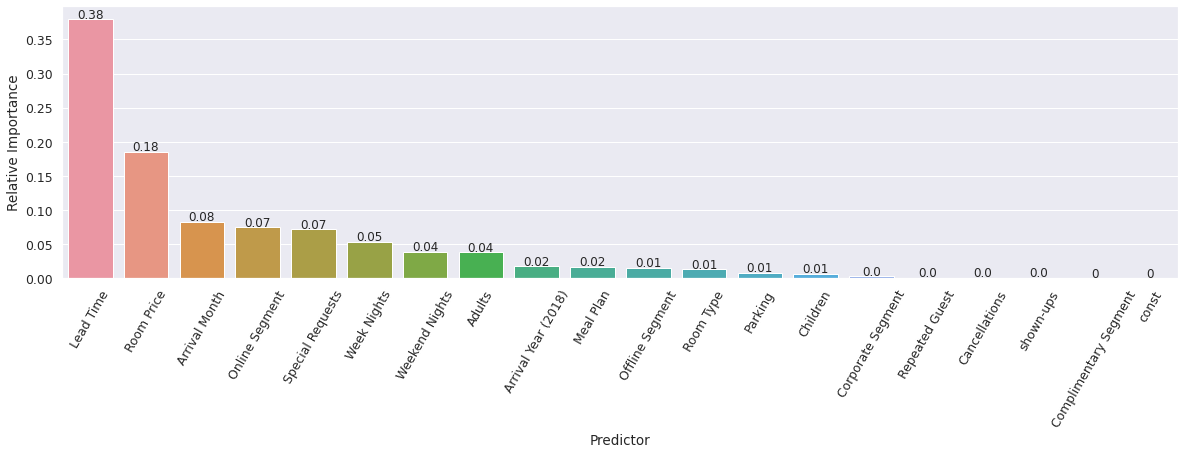

In [104]:
# Plotting importance of features
imp_df = pd.DataFrame({'Predictor': predictors, 'Relative Importance': full_tree.feature_importances_})
imp_df = imp_df.sort_values(by = 'Relative Importance', ascending = False)
plt.figure(figsize = (20, 5));
barplt = sns.barplot(data = imp_df, x = 'Predictor', y = 'Relative Importance'); 
countplot_labeling(barplt, imp_df, perc = False, decimal = 2)
plt.xticks(rotation = 60);

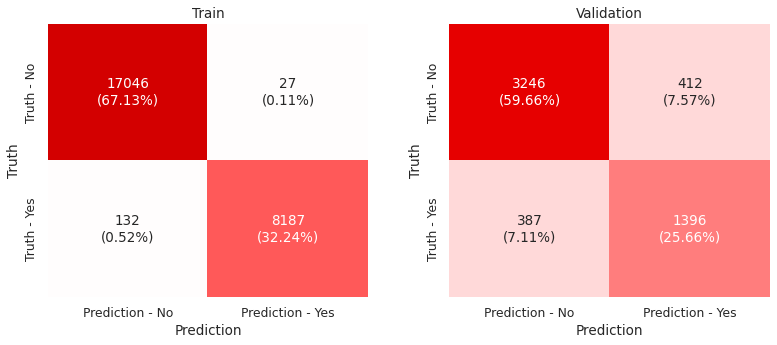

In [105]:
# Confusion matrices for training and validation sets

# Reconstructing the training set
y_recon = full_tree.predict(X_train_dt)
# Forecasting the validation set
y_pred = full_tree.predict(X_valid_dt)

# Plotting confusion matrices
plt.figure(figsize = (11, 5))
plt.subplot(121);
make_confusion_matrix(y_train_dt, y_recon)
plt.title('Train');
plt.subplot(122);
make_confusion_matrix(y_valid_dt, y_pred)
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [106]:
# Displaying the performance metrics on train and validation sets
full_tree_performance = model_eval(full_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)
full_tree_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.994,0.984,0.997,0.990,0.998
Validation,0.853,0.783,0.772,0.777,0.887


#### Observations:


*   The very large size of the full tree (36 layers with more than 6000 nodes) renders the presentation of its graph and equations fairly uninformative. We will plot the pruned trees, however.

*   The performance of the full tree is almost perfect on the training set, and although fairly good on validation set as well (better than the first logistic regression model), but the performance gap between the two and the enormous size of the full tree suggest that (pre/post-)pruning can help develop a much more robust and interpretable model. 

*   According to the full tree, lead time, room price and arrival month are the most impactful parameters on the cancellation status, respectively.




### Pre-Pruning the Full Tree: Maximiazing Recall

We adopt two different approaches towards prepuning. First we attemt to maximize the recall score, and then we'll develop a pre-pruned tree that maximes the F1 score. This is aligned with the two objectives the hotel chain might have in mind.

In [107]:
# Conducting a grid search on hyperparameters of decision tree

# Defining the baseline model
base_model = DecisionTreeClassifier(random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
               'class_weight': ['none', 'balanced'], 'max_depth': np.arange(2, 9, 2),
               'max_leaf_nodes': [5, 10, 25, 50, 100],
               'min_samples_split': [5, 10, 15, 25, 50]}

# Setting accuracy criterion
acc_criterion = make_scorer(recall_score)

# Conducting a grid search on all given hyperparameters
all_prepruned_models = GridSearchCV(base_model, param_grid = hyperparams, 
                                    scoring = acc_criterion, cv = 5)               
all_prepruned_models = all_prepruned_models.fit(X_train_dt, y_train_dt)

# Extracting the best model (maximum recall)
prepruned_recall_tree = all_prepruned_models.best_estimator_
prepruned_recall_tree = prepruned_recall_tree.fit(X_train_dt, y_train_dt)

print('Selected criterion:', prepruned_recall_tree.criterion)
print('Selected splitter:', prepruned_recall_tree.splitter)
prepruned_recall_tree

Selected criterion: gini
Selected splitter: best


DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=5,
                       min_samples_split=5, random_state=1)

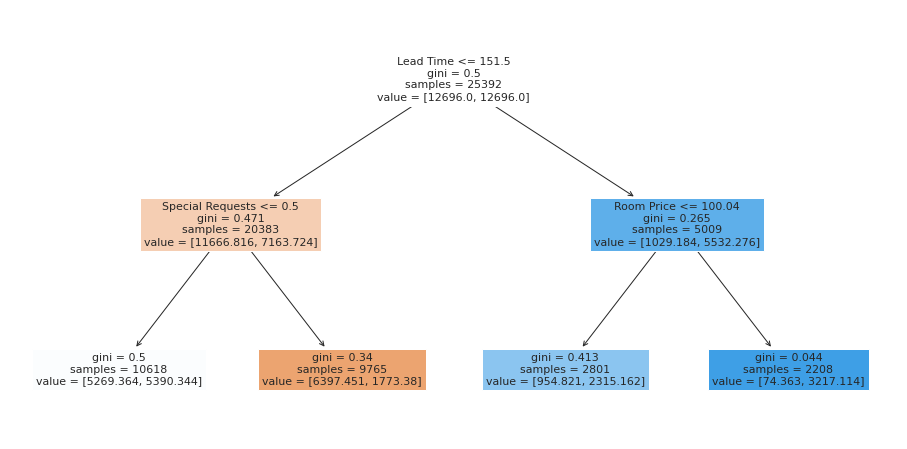

In [108]:
# Plotting the recall-based prepruned tree 
plt.figure(figsize = (16, 8));
tree.plot_tree(prepruned_recall_tree, feature_names = predictors, filled = True, fontsize = 11, node_ids = False, class_names = None)
plt.show()

In [109]:
# Displaying the equations of the recall-based prepruned tree 
print(tree.export_text(prepruned_recall_tree, feature_names = predictors, show_weights = True))

|--- Lead Time <= 151.50
|   |--- Special Requests <= 0.50
|   |   |--- weights: [5269.36, 5390.34] class: 1
|   |--- Special Requests >  0.50
|   |   |--- weights: [6397.45, 1773.38] class: 0
|--- Lead Time >  151.50
|   |--- Room Price <= 100.04
|   |   |--- weights: [954.82, 2315.16] class: 1
|   |--- Room Price >  100.04
|   |   |--- weights: [74.36, 3217.11] class: 1



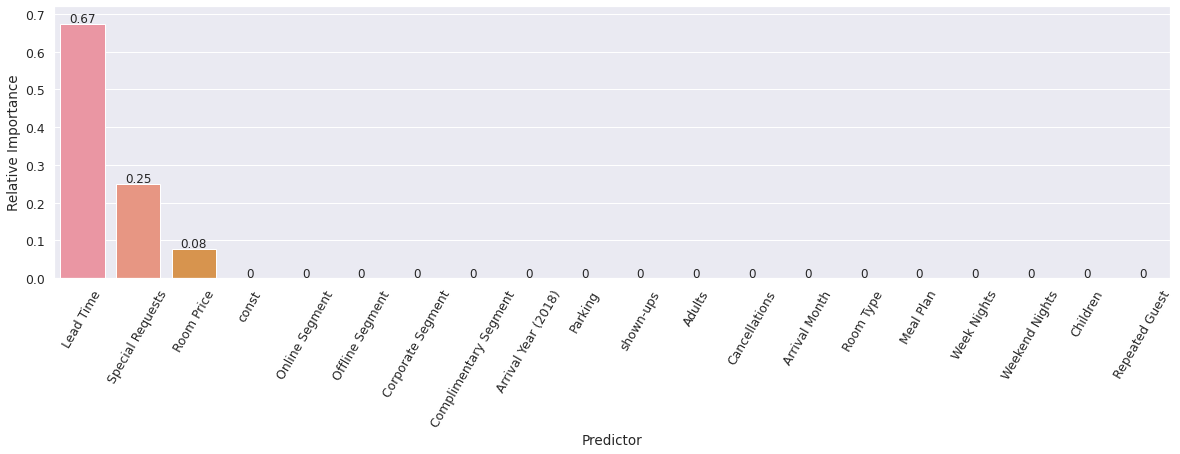

In [110]:
# Plotting importance of features
imp_df = pd.DataFrame({'Predictor': predictors, 'Relative Importance': prepruned_recall_tree.feature_importances_})
imp_df = imp_df.sort_values(by = 'Relative Importance', ascending = False)
plt.figure(figsize = (20, 5));
barplt = sns.barplot(data = imp_df, x = 'Predictor', y = 'Relative Importance'); 
countplot_labeling(barplt, imp_df, perc = False, decimal = 2)
plt.xticks(rotation = 60);
plt.ylim(0, 0.72);

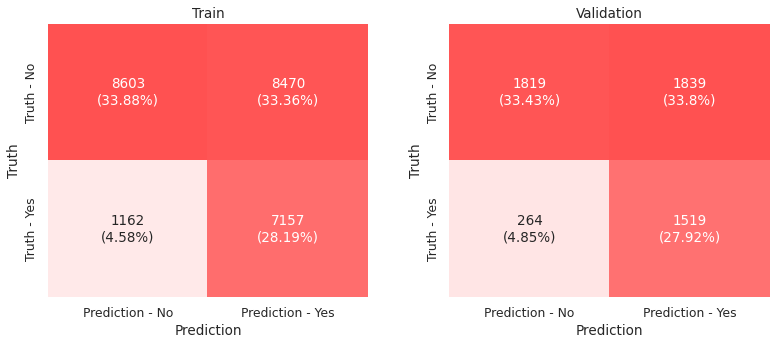

In [111]:
# Confusion matrices for training and validation sets

# Reconstructing the training set
y_recon = prepruned_recall_tree.predict(X_train_dt)
# Forecasting the validation set
y_pred = prepruned_recall_tree.predict(X_valid_dt)

# Plotting confusion matrices
plt.figure(figsize = (11, 5))
plt.subplot(121);
make_confusion_matrix(y_train_dt, y_recon)
plt.title('Train');
plt.subplot(122);
make_confusion_matrix(y_valid_dt, y_pred)
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [112]:
# Displaying the performance metrics on train and validation sets
prepruned_recall_tree_performance = model_eval(prepruned_recall_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)
prepruned_recall_tree_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.621,0.860,0.458,0.598,0.504
Validation,0.613,0.852,0.452,0.591,0.497


#### Observations:


*   However the compact tree resulting from the pre-pruning has been able to increase the recall score above what it was for the ROC-optimal logistic regression model, this has come at the price of significantly reducing the precision and F1 scores. Note the large no. of false positives in the confusion matrices. In fact, the full tree has much higher accuracy, precision and F1 scores on the validation set, but it's too complex.

*   The top three decisive factor, according to the recall-optimal prepruned tree, are lead time, no. of special requests and average room price, respectively. Lead time was the most important parameter in the full tree, as well. 



### Pre-Pruning the Full Tree: Maximiazing F1

In [113]:
# Conducting a grid search on hyperparameters of decision tree

# Defining the baseline model
base_model = DecisionTreeClassifier(random_state = 1)

# Setting the range of hyperparameters
hyperparams = {'criterion': ['gini', 'entropy'], 'splitter': ['best', 'random'], 
               'class_weight': ['none', 'balanced'], 'max_depth': np.arange(2, 9, 2),
               'min_samples_split': [10, 20, 30, 50],
               'max_leaf_nodes': [50, 100, 150, 200, 250]}

# Setting accuracy criterion
acc_criterion = make_scorer(f1_score)

# Conducting a grid search on all given hyperparameters
all_prepruned_models = GridSearchCV(base_model, param_grid = hyperparams, 
                                    scoring = acc_criterion, cv = 5)               
all_prepruned_models = all_prepruned_models.fit(X_train_dt, y_train_dt)

# Extracting the best model (maximum F1)
prepruned_f1_tree = all_prepruned_models.best_estimator_
prepruned_f1_tree = prepruned_f1_tree.fit(X_train_dt, y_train_dt)

print('Selected criterion:', prepruned_f1_tree.criterion)
print('Selected splitter:', prepruned_f1_tree.splitter)
prepruned_f1_tree

Selected criterion: gini
Selected splitter: best


DecisionTreeClassifier(class_weight='balanced', max_depth=8, max_leaf_nodes=100,
                       min_samples_split=50, random_state=1)

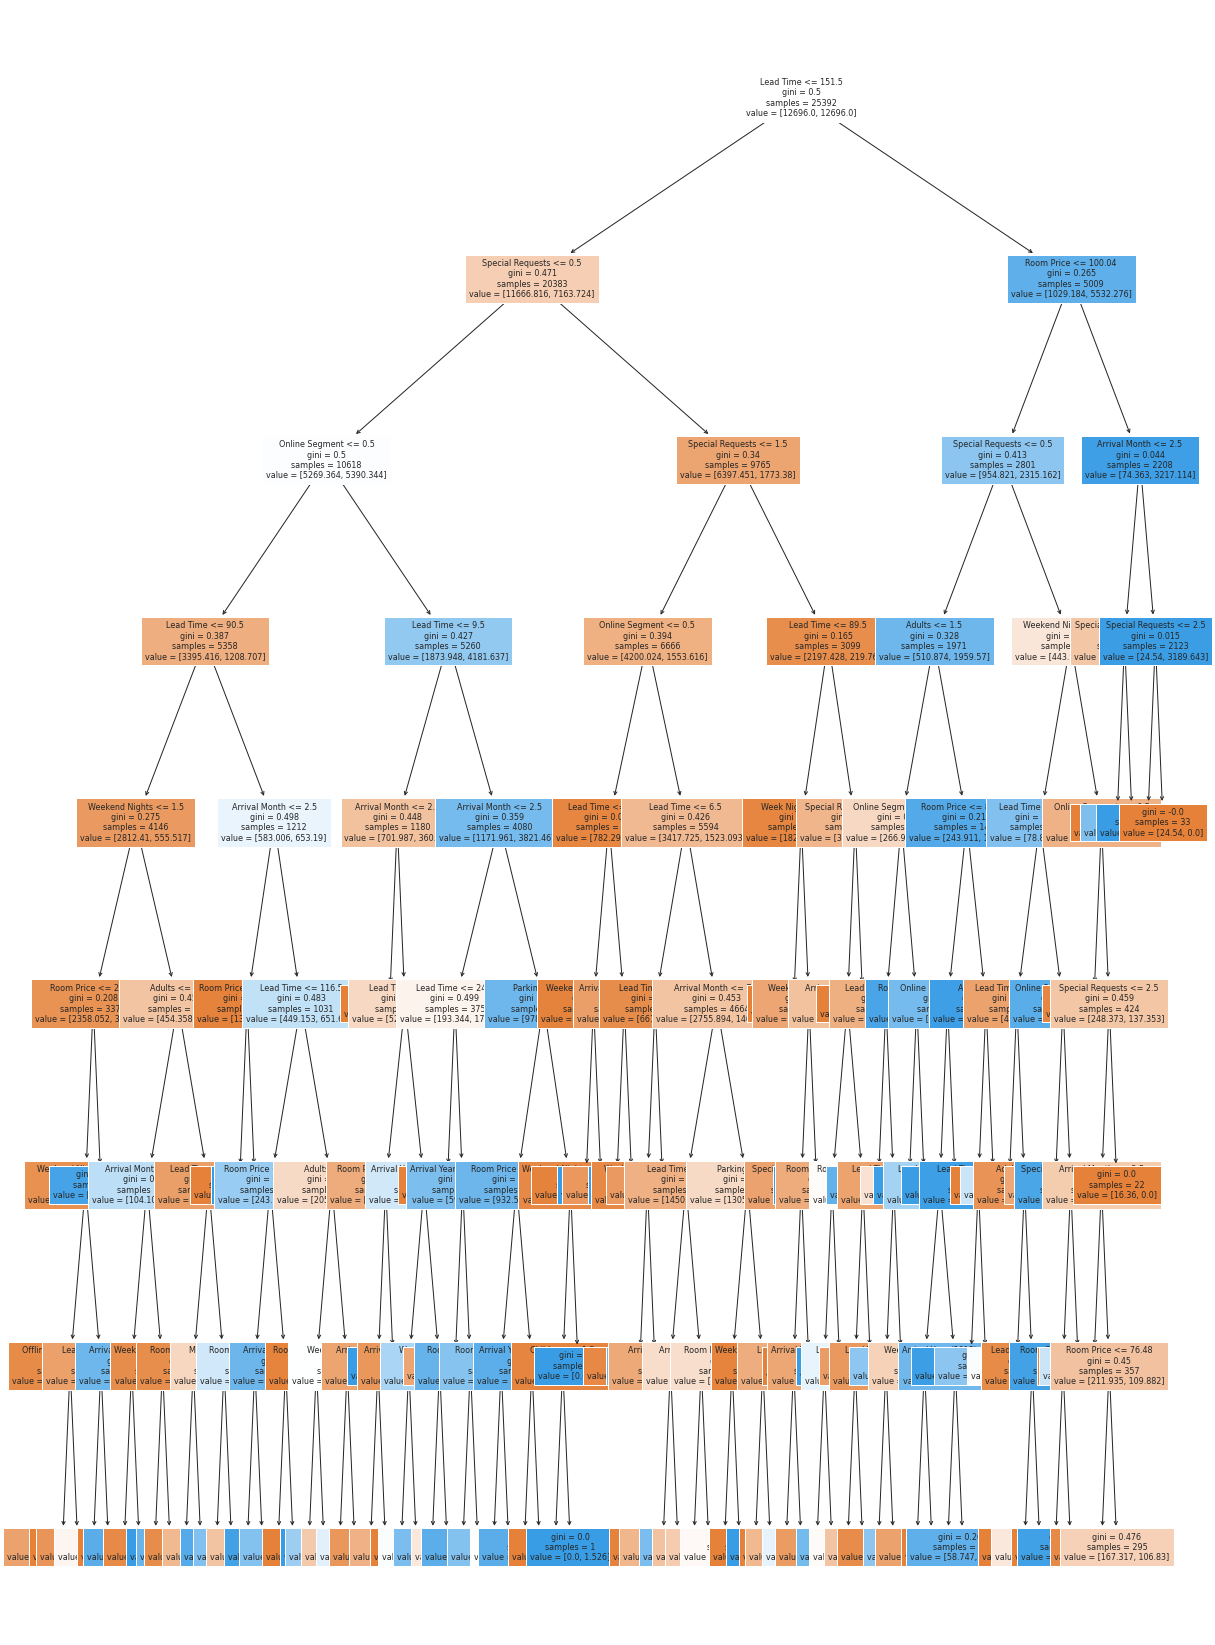

In [114]:
# Plotting the f1-based prepruned tree 
plt.figure(figsize = (20, 30));
tree.plot_tree(prepruned_f1_tree, feature_names = predictors, filled = True, fontsize = 8, node_ids = False, class_names = None)
plt.show()

In [115]:
# Displaying the equations of the f1-based prepruned tree 
print(tree.export_text(prepruned_f1_tree, feature_names = predictors, show_weights = True))

|--- Lead Time <= 151.50
|   |--- Special Requests <= 0.50
|   |   |--- Online Segment <= 0.50
|   |   |   |--- Lead Time <= 90.50
|   |   |   |   |--- Weekend Nights <= 1.50
|   |   |   |   |   |--- Room Price <= 202.00
|   |   |   |   |   |   |--- Weekend Nights <= 0.50
|   |   |   |   |   |   |   |--- Offline Segment <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [536.16, 141.93] class: 0
|   |   |   |   |   |   |   |--- Offline Segment >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1226.99, 0.00] class: 0
|   |   |   |   |   |   |--- Weekend Nights >  0.50
|   |   |   |   |   |   |   |--- Lead Time <= 65.50
|   |   |   |   |   |   |   |   |--- weights: [522.03, 83.94] class: 0
|   |   |   |   |   |   |   |--- Lead Time >  65.50
|   |   |   |   |   |   |   |   |--- weights: [71.39, 65.62] class: 0
|   |   |   |   |   |--- Room Price >  202.00
|   |   |   |   |   |   |--- weights: [1.49, 22.89] class: 1
|   |   |   |   |--- Weekend Nights >  1.50
|   |   |   |   |   |-

#### Notes:

Note that, here, we have capped the maximum depth of the tree at 8, otherwise it would grow even beyond its current complex structure and become far more intricate.

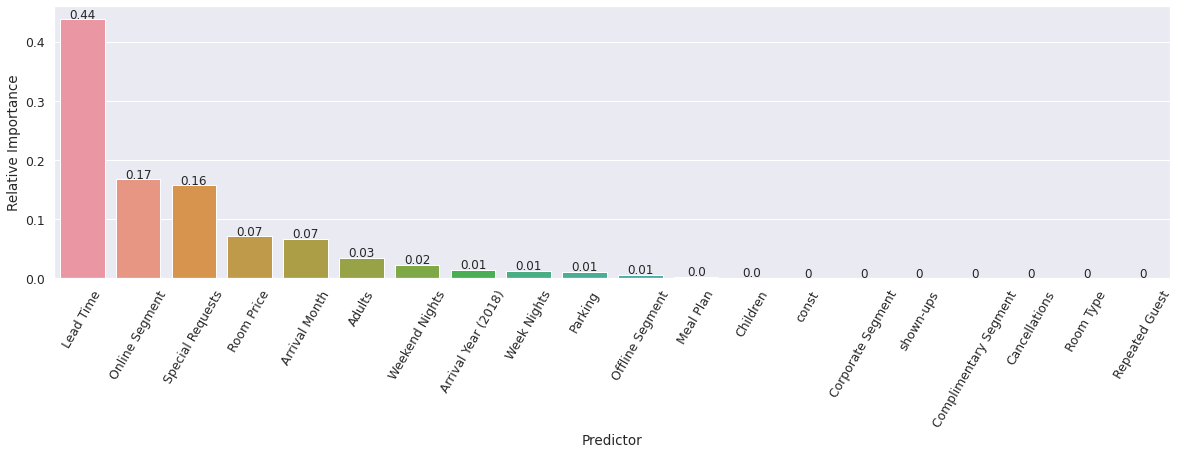

In [116]:
# Plotting importance of features
imp_df = pd.DataFrame({'Predictor': predictors, 'Relative Importance': prepruned_f1_tree.feature_importances_})
imp_df = imp_df.sort_values(by = 'Relative Importance', ascending = False)
plt.figure(figsize = (20, 5));
barplt = sns.barplot(data = imp_df, x = 'Predictor', y = 'Relative Importance'); 
countplot_labeling(barplt, imp_df, perc = False, decimal = 2)
plt.xticks(rotation = 60);

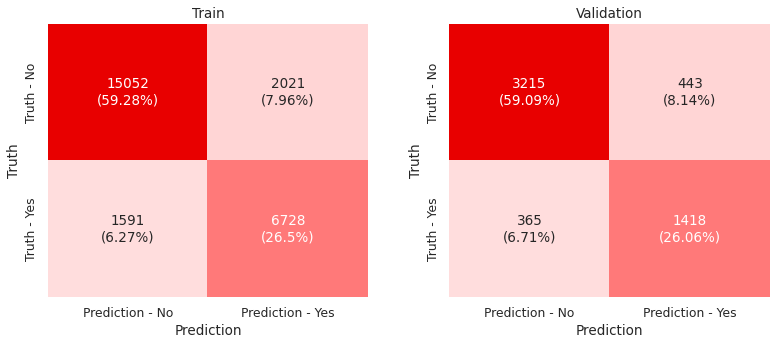

In [117]:
# Confusion matrices for training and validation sets

# Reconstructing the training set
y_recon = prepruned_f1_tree.predict(X_train_dt)
# Forecasting the validation set
y_pred = prepruned_f1_tree.predict(X_valid_dt)

# Plotting confusion matrices
plt.figure(figsize = (11, 5))
plt.subplot(121);
make_confusion_matrix(y_train_dt, y_recon)
plt.title('Train');
plt.subplot(122);
make_confusion_matrix(y_valid_dt, y_pred)
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [118]:
# Displaying the performance metrics on train and validation sets
prepruned_f1_tree_performance = model_eval(prepruned_f1_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)
prepruned_f1_tree_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.858,0.809,0.769,0.788,0.882
Validation,0.851,0.795,0.762,0.778,0.879


#### Observations:


*   The resulting decision tree is too large and is composed of dozens of nodes (199 to be exact) and 8 layers. Regardless, it's still much smaller than the full tree with 36 layers and 6381 nodes.

*   Despite being somewhat complex, the model doesn't show any sign of being overfitted, as the performance metrics on training and validation sets are very close to each other.

*   While the recall score of the F1-optimal model is ~ 0.05 less than that of the recall-optimal model, the precion and F1 scores of the former are respectively ~ 0.3 and ~ 0.2 points higher. This means that the F1-optimal model has barely sacrificed recall and has significantly improved the precision of its predictions for cancellation status. Note that the F1-optimal tree is far more complex.

*   The top three determining predictor of cancellation status, according to the F1-optimal model, are lead time, booking from online segment and no. of special requests. 



### Post-Pruning the Full Tree

*   Here, only F1 score is studied in order to resolve the overfitting and improve the performance on validation set.

*   As seen before, focusing on recall can really hurt the precision, and result in many lost business opportunities. On the other hand, F1 score can give us the advantages of both worlds, i.e., it can capture a faily large fraction of cancellations correctly, while not producing many false positives.

In [119]:
# Defining the baseline model
dtr = DecisionTreeClassifier(random_state = 1, class_weight = 'balanced')
# Applying the cost-complexity pruning algorithm to the baseline
path = dtr.cost_complexity_pruning_path(X_train_dt, y_train_dt)
# Extracting effective alphas and impurites from the result of postpruning
eff_alphas, impurities = np.abs(path.ccp_alphas), path.impurities

#### Notes:

Here, class_weight was set equal to 'balanced', as we learned from pre-pruning that it yields more accurate models.

In [120]:
# Building post-pruned models corresponding to all effective alphas

# List of all postpruned models
all_postpruned_models = []

# Looping over all alphas to build a decision tree for each
for alpha in eff_alphas:
    dtr = DecisionTreeClassifier(random_state = 1, ccp_alpha = alpha, 
                                 class_weight = 'balanced')
    dtr = dtr.fit(X_train_dt, y_train_dt)
    all_postpruned_models.append(dtr)

print('No. of nodes in the model with the highest effective alpha:', all_postpruned_models[-1].tree_.node_count)  
print('Depth of the model with the highest effective alpha:', all_postpruned_models[-1].tree_.max_depth) 

# Removing the model with the highest alpha as it corresponds to the original data with no change
all_postpruned_models.pop()
eff_alphas = eff_alphas[:-1]
impurities = impurities[:-1]

No. of nodes in the model with the highest effective alpha: 1
Depth of the model with the highest effective alpha: 0


In [121]:
# Making lists of no. of nodes and tree depths
all_nodes = []
all_depths = []
for i in range(len(all_postpruned_models)):
    all_nodes.append(all_postpruned_models[i].tree_.node_count)
    all_depths.append(all_postpruned_models[i].tree_.max_depth)

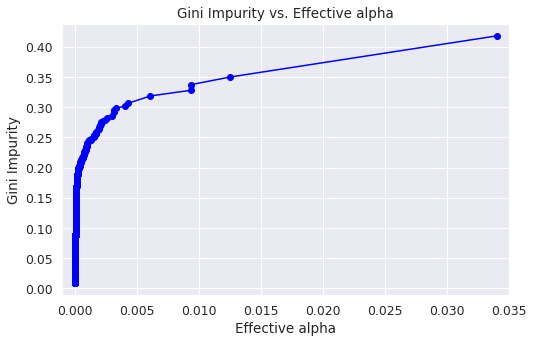

In [122]:
# Plotting the variation of impurity with effective alpha
plt.figure(figsize = (8, 5));
plt.plot(eff_alphas, impurities, color = 'blue', marker = 'o');
plt.xlabel('Effective alpha');
plt.ylabel('Gini Impurity');
plt.title('Gini Impurity vs. Effective alpha');
plt.xlim(-0.001, 0.035);

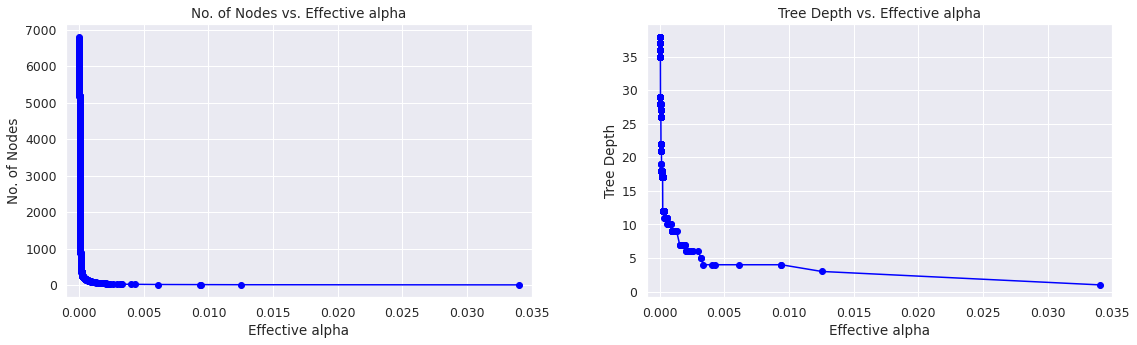

In [123]:
# Plotting the variation of # of nodes and tree depth with effective alpha
plt.figure(figsize = (16, 5));
plt.subplot(121);
plt.plot(eff_alphas, all_nodes, color = 'blue', marker = 'o');
plt.xlabel('Effective alpha');
plt.ylabel('No. of Nodes');
plt.title('No. of Nodes vs. Effective alpha');
plt.xlim(-0.001, 0.035);
plt.subplot(122);
plt.plot(eff_alphas, all_depths, color = 'blue', marker = 'o');
plt.xlabel('Effective alpha');
plt.ylabel('Tree Depth');
plt.title('Tree Depth vs. Effective alpha');
plt.xlim(-0.001, 0.035);
plt.tight_layout(w_pad = 4);

#### Observations:

*   As effective alpha grows, which is a measure of how much error is induced by removing a certain subtree, impurity increases and the the number of nodes and the depth of tree (no. of layers) decrease, as the tree becomes trimmed and smaller.

*   The smallest alpha = 0 corresponds to the full tree with class_weight = 'balanced', which has 6817 nodes and 38 layers. Note that this tree is even bigger than the full tree model we initially made for which class_weight was set at its default value (None).

*   The tree with the largest effective alpha is just the full dataset in the root node with no branching. 

In [124]:
# Calculating performance metrics of all postpruned models

# Lists of all accuracy and f1 scores on training set
train_accs = []
train_f1s = []
# Lists of all accuracy and f1 scores on validation set
valid_accs = []
valid_f1s = []

for model in all_postpruned_models:
    y_recon = model.predict(X_train_dt) 
    y_pred = model.predict(X_valid_dt) 
    # Performance metrics on training set
    train_accs.append(accuracy_score(y_train_dt, y_recon))
    train_f1s.append(f1_score(y_train_dt, y_recon))
    # Performance metrics on validation set
    valid_accs.append(accuracy_score(y_valid_dt, y_pred))
    valid_f1s.append(f1_score(y_valid_dt, y_pred))

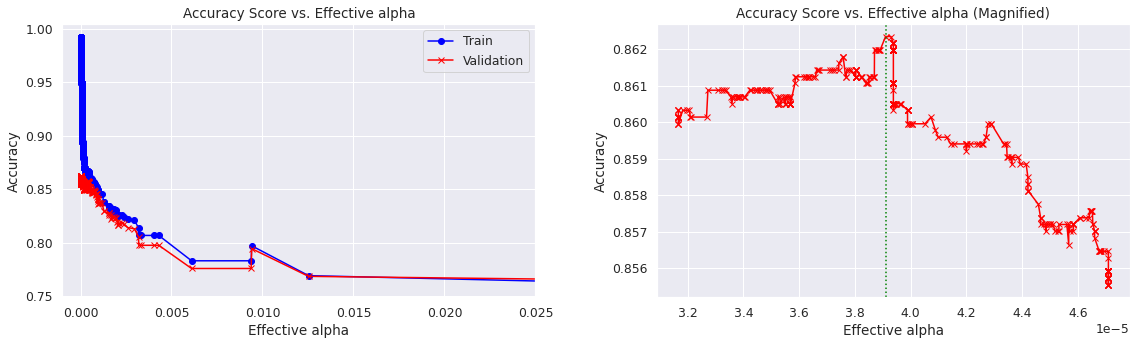

In [125]:
# Finding the alpha corresponding to the highest accuracy on validation
best_acc_index = np.argmax(valid_accs)
best_acc_alpha = eff_alphas[best_acc_index]

# Plotting accuracy vs. alpha
plt.figure(figsize = (16, 5));
plt.subplot(121);
plt.plot(eff_alphas, train_accs, color = 'blue', marker = 'o');
plt.plot(eff_alphas, valid_accs, color = 'red', marker = 'x');
plt.xlabel('Effective alpha');
plt.ylabel('Accuracy');
plt.title('Accuracy Score vs. Effective alpha');
plt.legend(['Train', 'Validation'], loc = 'upper right');
plt.xlim(-0.001, 0.025);
plt.subplot(122);
plt.plot(eff_alphas[best_acc_index-130:best_acc_index+200], 
         valid_accs[best_acc_index-130:best_acc_index+200], color = 'red', marker = 'x');
plt.axvline(best_acc_alpha, linestyle = ':', color = 'green')         
plt.xlabel('Effective alpha');
plt.ylabel('Accuracy');
plt.title('Accuracy Score vs. Effective alpha (Magnified)');
plt.tight_layout(w_pad = 3);

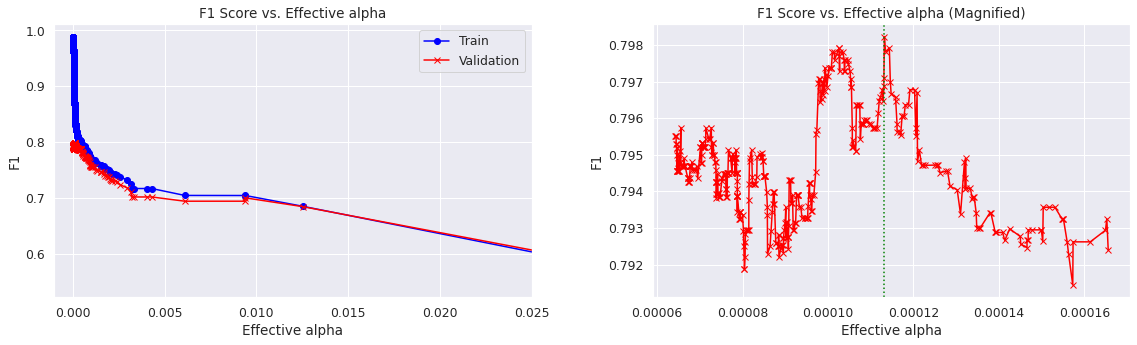

In [126]:
# Finding the alpha corresponding to the highest F1 on validation
best_f1_index = np.argmax(valid_f1s)
best_f1_alpha = eff_alphas[best_f1_index]

# Plotting accuracy vs. alpha
plt.figure(figsize = (16, 5));
plt.subplot(121);
plt.plot(eff_alphas, train_f1s, color = 'blue', marker = 'o');
plt.plot(eff_alphas, valid_f1s, color = 'red', marker = 'x');
plt.xlabel('Effective alpha');
plt.ylabel('F1');
plt.title('F1 Score vs. Effective alpha');
plt.legend(['Train', 'Validation'], loc = 'upper right');
plt.xlim(-0.001, 0.025);
plt.subplot(122);
plt.plot(eff_alphas[best_f1_index-320:best_f1_index+80], 
         valid_f1s[best_f1_index-320:best_f1_index+80], color = 'red', marker = 'x');
plt.axvline(best_f1_alpha, linestyle = ':', color = 'green')         
plt.xlabel('Effective alpha');
plt.ylabel('F1');
plt.title('F1 Score vs. Effective alpha (Magnified)');
plt.tight_layout(w_pad = 3);

In [127]:
# Finding the best post-pruned alpha via F1 score
best_f1_alpha = eff_alphas[np.argmax(valid_f1s)]
postpruned_f1_tree = all_postpruned_models[np.argmax(valid_f1s)]

print('ccp_alpha = {} maximizes F1 score on validation set.'.format(round(best_f1_alpha, 6)), end = '\n'*2)
print('The depth of the F1-optimal, post-pruned tree is {}, while the depth of the full tree model is {}.'
      .format(postpruned_f1_tree.tree_.max_depth, full_tree.tree_.max_depth), end = '\n'*2)
print('The F1-optimal, post-pruned tree has {} nodes, while the full tree model has {} nodes.'
      .format(postpruned_f1_tree.tree_.node_count, full_tree.tree_.node_count))

ccp_alpha = 0.000113 maximizes F1 score on validation set.

The depth of the F1-optimal, post-pruned tree is 22, while the depth of the full tree model is 36.

The F1-optimal, post-pruned tree has 761 nodes, while the full tree model has 6381 nodes.


#### Notes:

*   Here, due to its enormous size, the post-pruned decision tree will not be plotted, and its equations won't be displayed.

*   Note that in the above statement the depth and node count of the post-pruned tree was compared to the original full tree that we'd developed early on in the 'Decison Tree Model' section, for which class_weight = None. It shouldn't be mistaken with the full tree corresponding to ccp_alpha = 0. 

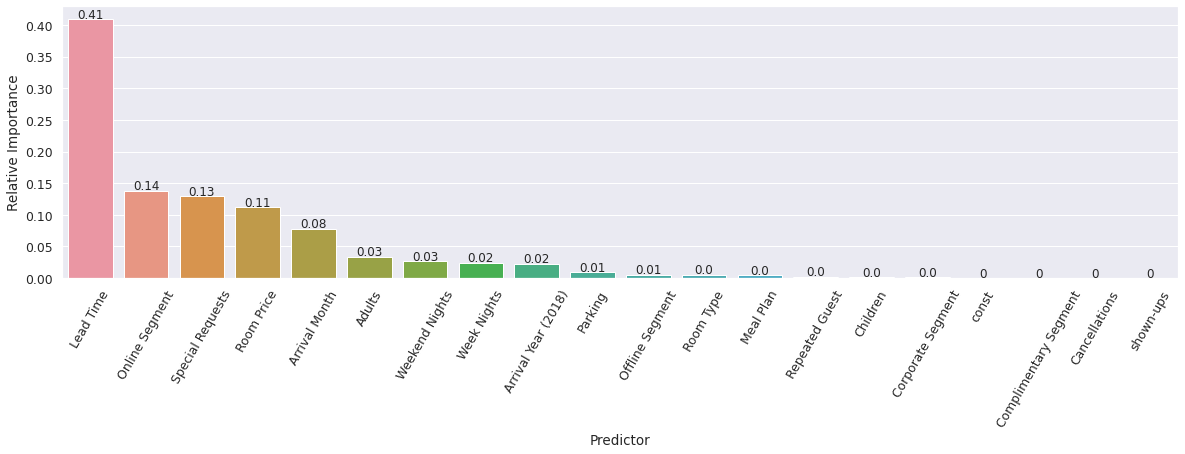

In [128]:
# Plotting importance of features
imp_df = pd.DataFrame({'Predictor': predictors, 'Relative Importance': postpruned_f1_tree.feature_importances_})
imp_df = imp_df.sort_values(by = 'Relative Importance', ascending = False)
plt.figure(figsize = (20, 5));
barplt = sns.barplot(data = imp_df, x = 'Predictor', y = 'Relative Importance'); 
countplot_labeling(barplt, imp_df, perc = False, decimal = 2)
plt.xticks(rotation = 60);

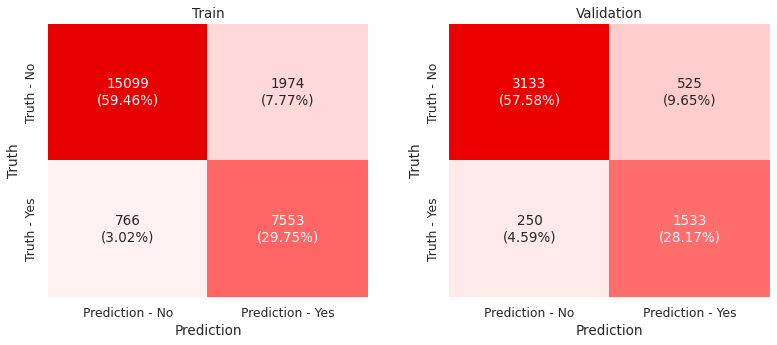

In [129]:
# Confusion matrices for training and validation sets

# Reconstructing the training set
y_recon = postpruned_f1_tree.predict(X_train_dt)
# Forecasting the validation set
y_pred = postpruned_f1_tree.predict(X_valid_dt)

# Plotting confusion matrices
plt.figure(figsize = (11, 5))
plt.subplot(121);
make_confusion_matrix(y_train_dt, y_recon)
plt.title('Train');
plt.subplot(122);
make_confusion_matrix(y_valid_dt, y_pred)
plt.title('Validation');
plt.tight_layout(w_pad = 3);

In [130]:
# Displaying the performance metrics on train and validation sets
postpruned_f1_tree_performance = model_eval(postpruned_f1_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)
postpruned_f1_tree_performance

,Accuracy,Recall,Precision,F1,Specificity
Train,0.892,0.908,0.793,0.846,0.884
Validation,0.858,0.860,0.745,0.798,0.856


#### Observations:

*   Although the differences between the performance metrics on training and validation sets are larger than those for pre-pruned models, perhaps due to the much larger size of the post-pruned tree, they are still much smaller than that for the full tree model. So we can claim the overfitting issue has been addressed by post-pruning to a large degree. 

*   Nonetheless, the F1-optimal, post-pruned tree has higher F1 scores on both training and validation sets, similar precisions, and much higher recalls, in comparison with the F1-optimal, pre-pruned tree.  

*   Identical to the F1-optimal, pre-pruned tree, the post-pruned model finds lead time, booking from online segment and no. of special requests to be the top three important predictors, respectively. In fact, the first seven predictors of the two models, sorted by their relative importance, are the same.

### Comparison of All Decision Trees

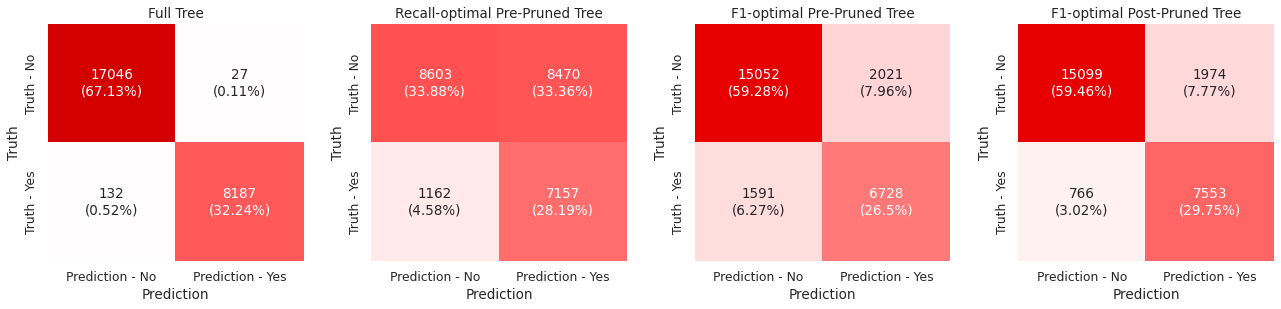

In [131]:
# Generating confusion matrices for training set

# Reconstructing the training set for full tree (class_weight = None)
y_recon_full = full_tree.predict(X_train_dt) 

# Reconstructing the training set for recall-optimal prepruned tree (class_weight = 'balanced')
y_recon_prepruned_recall = prepruned_recall_tree.predict(X_train_dt)

# Reconstructing the training set for F1-optimal prepruned tree (class_weight = 'balanced')
y_recon_prepruned_f1 = prepruned_f1_tree.predict(X_train_dt)

# Reconstructing the training set for F1-optimal prepruned tree (class_weight = 'balanced')
y_recon_postpruned_f1 = postpruned_f1_tree.predict(X_train_dt)

# Plotting confusion matrices for training set
plt.figure(figsize = (18, 4.5))
plt.subplot(141);
make_confusion_matrix(y_train_dt, y_recon_full)
plt.title('Full Tree');
plt.subplot(142);
make_confusion_matrix(y_train_dt, y_recon_prepruned_recall)
plt.title('Recall-optimal Pre-Pruned Tree');
plt.subplot(143);
make_confusion_matrix(y_train_dt, y_recon_prepruned_f1)
plt.title('F1-optimal Pre-Pruned Tree');
plt.subplot(144);
make_confusion_matrix(y_train_dt, y_recon_postpruned_f1)
plt.title('F1-optimal Post-Pruned Tree');
plt.tight_layout(w_pad = 2);

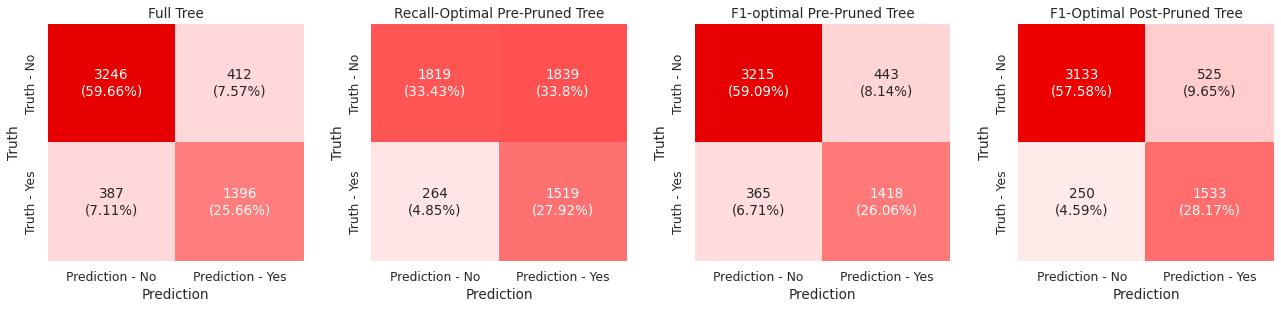

In [132]:
# Generating confusion matrices for validation set

# Predicting the validation set for full tree (class_weight = None)
y_pred_full = full_tree.predict(X_valid_dt) 

# Predicting the validation set for recall-optimal prepruned tree (class_weight = 'balanced')
y_pred_prepruned_recall = prepruned_recall_tree.predict(X_valid_dt)

# Predicting the validation set for F1-optimal prepruned tree (class_weight = 'balanced')
y_pred_prepruned_f1 = prepruned_f1_tree.predict(X_valid_dt)

# Predicting the validation set for F1-optimal prepruned tree (class_weight = 'balanced')
y_pred_postpruned_f1 = postpruned_f1_tree.predict(X_valid_dt)

# Plotting confusion matrices for validation set
plt.figure(figsize = (18, 4.5))
plt.subplot(141);
make_confusion_matrix(y_valid_dt, y_pred_full)
plt.title('Full Tree');
plt.subplot(142);
make_confusion_matrix(y_valid_dt, y_pred_prepruned_recall)
plt.title('Recall-Optimal Pre-Pruned Tree');
plt.subplot(143);
make_confusion_matrix(y_valid_dt, y_pred_prepruned_f1)
plt.title('F1-optimal Pre-Pruned Tree');
plt.subplot(144);
make_confusion_matrix(y_valid_dt, y_pred_postpruned_f1)
plt.title('F1-Optimal Post-Pruned Tree');
plt.tight_layout(w_pad = 2);

In [133]:
# Calculating performance metrics for different thresholds

# Full tree (class_weight = None)
full_tree_perform = model_eval(full_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)

# Recall-optimal prepruned tree (class_weight = 'balanced')
prepruned_recall_perform = model_eval(prepruned_recall_tree, X_train_dt, y_train_dt, 
                                      X_valid_dt, y_valid_dt)

# F1-optimal prepruned tree (class_weight = 'balanced')
prepruned_f1_perform = model_eval(prepruned_f1_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)

# F1-optimal postpruned tree (class_weight = 'balanced')
postpruned_f1_perform = model_eval(postpruned_f1_tree, X_train_dt, y_train_dt, X_valid_dt, y_valid_dt)

# Merging all performances in one dataframe (class_weight = 'balanced')
dtr_perform = pd.concat([full_tree_perform, prepruned_recall_perform, prepruned_f1_perform,
                        postpruned_f1_perform])

# Separating performances on train, validation and test
dtr_perform_train = dtr_perform.iloc[0::2]
dtr_perform_valid = dtr_perform.iloc[1::2]
dtr_perform_train.index = ['Full Tree', 'Recall-Optimal Pre-Pruned Tree', 'F1-Optimal Pre-Pruned Tree',
                           'F1-Optimal Post-pruned Tree']
dtr_perform_valid.index = ['Full Tree', 'Recall-Optimal Pre-Pruned Tree', 'F1-Optimal Pre-Pruned Tree',
                           'F1-Optimal Post-Pruned Tree']

In [134]:
# Comparing the performances of different decision tree models on training set
dtr_perform_train

,Accuracy,Recall,Precision,F1,Specificity
Full Tree,0.994,0.984,0.997,0.990,0.998
Recall-Optimal Pre-Pruned Tree,0.621,0.860,0.458,0.598,0.504
F1-Optimal Pre-Pruned Tree,0.858,0.809,0.769,0.788,0.882
F1-Optimal Post-pruned Tree,0.892,0.908,0.793,0.846,0.884


In [135]:
# Comparing the performances of different decision tree models on validation set
dtr_perform_valid

,Accuracy,Recall,Precision,F1,Specificity
Full Tree,0.853,0.783,0.772,0.777,0.887
Recall-Optimal Pre-Pruned Tree,0.613,0.852,0.452,0.591,0.497
F1-Optimal Pre-Pruned Tree,0.851,0.795,0.762,0.778,0.879
F1-Optimal Post-Pruned Tree,0.858,0.860,0.745,0.798,0.856


#### Observations:

* As expected, the full tree model, suffering from overfitting, has the highest gap between the evaluation metrics on training and testing sets.

* The recall-optimal pre-pruned model has a very high recall score on validation set (almost equal to that of the post-pruned model), but this has come at the price of substantially reducing the precision and creating a large number of false positives, i.e., this model will erroneously label many legitimate bookings as cancelled, costing the hotel chain lots of business opportunities.

* The post-pruned F1-optimal model somewhat outperforms its pre-pruned counterpart. It has a slightly (0.02) larger F1, but a much higher recall (0.065). This is expected, as a post-pruned model (based on the cost-complexity algorithm) considers many more options and searches over a much wider range of possibilities to build the final pruned tree. In fact, the post-pruned model has the highest accuracy, recall and F1 scores on the validation set.   

* We note that, in addition to pruning the tree, setting class_weight = 'balanced' can help improving the model's performance, when a certain class appears more frequently. This applies to the full tree model, but we decided to leave it at its original form (class_weight = None), for the sake of brevity, and since this conclusion was drawn during pruning. Anyways, the full tree is not our ideal and go-to model.

## Comparison of the Optimized Logistic Regression and Decision Tree Models

Here, the performance of all optimized models developed thus far (logistic regression or decision tree) will be compared to each other on the testing set, which has been left untouched up to this step. Note that since the performance of the raw (baseline) models (logistic regression model without looking at ROC or precision recall curves, or the full tree model) are inferior and suboptimal, we won't consider them here. 

In [136]:
# Calculating performance metrics for different thresholds on testing set

# Logistic regression model with thresh = ROC optimal 
lg_roc_test = model_eval(lg_model_final, X_train_final_lg, y_train_final_lg, 
                          X_test_final_lg, y_test_final_lg, valid = False,
                          thresh = opt_roc_tres)
# Logistic regression model with thresh = precision-recall optimal 
lg_prec_recall_test = model_eval(lg_model_final, X_train_final_lg, y_train_final_lg, 
                                 X_test_final_lg, y_test_final_lg, valid = False,
                                 thresh = opt_prec_recall_tres)
# Recall-optimal prepruned tree 
prepruned_recall_test = model_eval(prepruned_recall_tree, X_train_dt, y_train_dt, 
                                   X_test_dt, y_test_dt, valid = False)
# F1-optimal prepruned tree 
prepruned_f1_test = model_eval(prepruned_f1_tree, X_train_dt, y_train_dt, 
                               X_test_dt, y_test_dt, valid = False)
# F1-optimal postpruned tree 
postpruned_f1_test = model_eval(postpruned_f1_tree, X_train_dt, y_train_dt, 
                                X_test_dt, y_test_dt, valid = False)

# Merging all performances in one dataframe
slc_perform = pd.concat([lg_roc_test, lg_prec_recall_test, prepruned_recall_test, 
                         prepruned_f1_test, postpruned_f1_test])

# Making a dataset on only test rows
slc_perform_test = slc_perform.iloc[1::2]
slc_perform_test.index  = ['ROC-Optimal Logistic Regression Model (Thresh = {})'.format(round(opt_roc_tres, 3)), 
                           'Recall-Precision-Optimal Logistic Regression Model (Thresh = {})'.format(round(opt_prec_recall_tres, 3)),
                           'Recall-Optimal Pre-Pruned Tree', 'F1-Optimal Pre-Pruned Tree',
                           'F1-Optimal Post-Pruned Tree']
slc_perform_test                           

,Accuracy,Recall,Precision,F1,Specificity
ROC-Optimal Logistic Regression Model (Thresh = 0.269),0.771,0.827,0.612,0.703,0.744
Recall-Precision-Optimal Logistic Regression Model (Thresh = 0.426),0.801,0.683,0.702,0.693,0.859
Recall-Optimal Pre-Pruned Tree,0.613,0.855,0.452,0.592,0.496
F1-Optimal Pre-Pruned Tree,0.859,0.798,0.777,0.787,0.888
F1-Optimal Post-Pruned Tree,0.863,0.856,0.756,0.803,0.866


#### Observations:

* The performance metrics of all these models are very close to their counterparts on training/validation sets, again suggesting that the issue of overfitting has been resolved for all of them.

* F1-optimal post-pruned tree has the highest accuracy, recall and F1 scores, with a fairly large precision. This suggests that this model identifies cancelled bookings more accurately than the other models, while also not labeling many legitimate bookings that will not get cancelled, as cancelled. In fact, it labels 86.6% of not cancelled bookings correctly, as well (see the specifity score).

* Overall, tree-based models outperform logistic regression models. This can be mainly attributed to the nonlinear nature of decision trees, their larger number of hyperparameters that can be tuned to improve the performance, the strong pruning techniques associated with them (such as cost-complexity algorithm), and their better interpretability and capability for extracting patterns from data, instead of merely performing a linear, best-fit regression. 

* Note also that tree-based models do not trouble the programmer/user with a tricky hyperparameter such as threshold, whose variation can substantially changes the results, and finding its optimal value isn't straightforward, and is problem(objective)-based.

* The low precisions (and specificity scores) of the ROC-optimal logistic regression model and (especially) the recall-optimal model really stand out. This suggests that optimizing based on recall isn't a very good idea for this problem, as it causes significant lost opportunities.

* Although the recall-precision-optimal model has fairly balanced performance metrics (moderate and close values for recall, precision and F1 scores), but none of them is high enough to make this model a good candidate for any of the major objectives of this project. Its recall is fairly low, so it will miss many cancellations, but its precision (and specificity) isn't too great either, so still a decent number of shown-ups will be classified as cancellations, too. 

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

Here, we do not intend to present a lengthy summary of all findings. Instead, we aim to touch base on the major ones, and draw actionable conclusions and recommendations from those.

***Key observations from EDA and classification models:***

*   Close to 1/3 of bookings get cancelled. So it's of paramount importance to the hotel chain to forecast them, so that it can mitigate the undesired costs of last-minute cancellations. 
*   We were able to develop a decision-tree-based model capable of recalling ~ 86% of cancellations (on testing set). Its F1-score (~ 0.8) is also the highest among all models, indicating that it has a high precision as well, and won't mislabel many legitimate bookings, as cancelled.
*   Recall-based optimization on classification models doesn't appear to be a very good idea for this problem, as they substantially hurt the precision of the model, thus mislabeling many legitimate future shown-ups as cancellations, and losing the hotel chain lots of business opportunities.  
*   Overall, decision trees prove to be more capable predictive tools than logistic regression models. This can be attributed to their nonlinear nature, superiority in extracting useful patterns from data, lesser sensitivity to outliers and the powerful optimization/pruning techniques associated with them.
*   Lead time appears to be the primary factor for determining whether a booking gets cancelled or not, according to all models. Reservations with big kead times aren't reliable, as a lot can happen that change the mind and plan of the customer.
*   After lead time, no. of special requests, the market segment, arrival month and room price are some of the other main parameters for deciding the cancellation status, whose relative importance may vary between different models.
*   Repeated guests are very less likely to cancel, indicating that the hotel chain has built a good relationship with its frequent visitors.  

***Business recommendations:***

*   Guests giving large lead times ($\gtrsim$ 150 days) are not very committed to their reservations. If most of these people cancel in the very last minute, the company should either change the possibility of booking too early (more than 6 months or a year before arrival for instance), increase their cancellation fees, make them pay partially at the moment of booking or any other policies that would make guests who book too early more commited to their reservation. 
*   Guests coming from online segment are far likelier to cancel than other segments, suggesting that making the cancellation fee dependent on the segment the customers coming from might be a good policy. The hotel chain can also ask for partial payment from the customers coming from the online segment.
*   Guests with no special request are more likely than average to cancel bookings. On ther other hand, those with two or more requests are fairly unlikely to cancel. The hotel chain can suggest/tie certain conditions/requests to customers (parking, meal plan, location and view of the room, etc.) during the booking process (some maybe even free of charge), as it may influence their behavior and reduce the chance of cancellation.
*   Customers arriving in colder months (especially January and December) are far more committed to their reservations than those arriving in warmer months (especially summer). Based on this, the company can make prices more competitive during summer (and a couple of months before and after) to reduce the cancellation rate, or make the cancellation fees dynamic and variable with month (lower in January and December, as there's not much to worry about and higher in summer).      
*   Single adult travelers are the ones most certain about their bookings. Families are much more likely to cancel their reservations. Following this finding, the company can alter its cancellation fees based on the room size (one bed has the smallest fee, and family-sized rooms have a higher cancellation fee), or ask for some partial payment at the moment of booking from those traveling with several companies.
*   Higher room prices make the customers hesitant about their booking, and will make them continue their search for better prices. The company may benefit and increase profitability by reducing the prices, especially during the vacation months, as no. of cancellations and their associated cost will go down. Or it can also include some additional amenities and services in the deal for free (if it's not willing to change the price), so that the customers think the value is worth the money.

***Recommendations for a future ML-based modeling:***

*   One important feature that I felt was missing from the dataset is the number of days before arrival that the booking had got cancelled. This variable is important since not all cancellations are equally detrimental. The last-minute ones are more harmful, while the ones with a big gap before arrival are replaceable by the hotel. 
*   The data contained only two years of data, with 2017 missing several months. A data sampled over several years, with fair and balanced representation of every month can help develop a far more robust and reliable model, as the customer behavior vary with month and certainly with month.